In [1]:
import pandas as pd
import numpy as np
import pathlib
import random
import re
import seaborn as sns

RANDOM_SEED = 19439
random.seed(RANDOM_SEED)

# 전라 방언 

In [2]:
df = pd.read_csv("../datas/output/jeonla_dialect_data_age.csv", index_col=0)
df

,방언,표준어,연령대,출처 파일
0,나는 다이어트에 대해서 말하고 싶어.,나는 다이어트에 대해서 말하고 싶어.,20대,DJDD20000001.json
1,하,하,20대,DJDD20000001.json
2,우리 집은 내가 봤을 때 살찔 수밖에 없는 구조를 가지고 있어.,우리 집은 내가 봤을 때 살찔 수밖에 없는 구조를 가지고 있어.,20대,DJDD20000001.json
3,다이어트를 해야 되는 사람은 애초에 야식을 많이 먹거나 아 어제도 야식을 먹었거든?,다이어트를 해야 되는 사람은 애초에 야식을 많이 먹거나 아 어제도 야식을 먹었거든?,20대,DJDD20000001.json
4,{laughing},{laughing},20대,DJDD20000001.json
...,...,...,...,...
1992096,임플란트를 하게 될라면은 뼈 이식을 해야 한다는데,임플란트를 하게 될라면은 뼈 이식을 해야 한다는데,50대,DJSX20004853.json
1992097,그러면 시간도 많이 걸리고 안 되잖아 그래서는 내가,그러면 시간도 많이 걸리고 안 되잖아 그래서는 내가,50대,DJSX20004853.json
1992098,아~ 그냥 어떻게 했으면 좋겠냐 그냥 브릿지는 어떠냐고 물어봤더니,아~ 그냥 어떻게 했으면 좋겠냐 그냥 브릿지는 어떠냐고 물어봤더니,50대,DJSX20004853.json
1992099,어~브릿지 하는 게 더 낫겠다고 그거 뼈이식하고 그러면 시간도 오래 걸리고,어~브릿지 하는 게 더 낫겠다고 그거 뼈이식하고 그러면 시간도 오래 걸리고,50대,DJSX20004853.json


c:\Users\wnsgh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wnsgh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wnsgh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wnsgh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wnsgh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


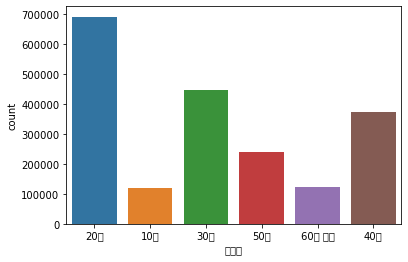

In [4]:
ax = sns.countplot(x="연령대", data=df)

In [7]:
age_table = df["연령대"].value_counts().to_frame().T
total_count = sum([int(age_table[col]) for col in age_table.columns])

for col in age_table.columns:
    age_table[col] = float(age_table[col]) / total_count

age_table

,20대,30대,40대,50대,60대 이상,10대
연령대,0.347108,0.224339,0.18742,0.119805,0.061191,0.060137


In [6]:
df[df["연령대"].isna()]

,방언,표준어,연령대,출처 파일
15077,그냥 존나 넓거든 존나 넓은데 존나 넓은데 할 게 없어.,그냥 존나 넓거든 존나 넓은데 존나 넓은데 할 게 없어.,NaN,DJDD20000035.json
45725,그래서 점심시간에는 만나서 걔랑 밥 먹고 이랬는데 내가 하도 파토를 많이 내니까,그래서 점심시간에는 만나서 걔랑 밥 먹고 이랬는데 내가 하도 파투를 많이 내니까,NaN,DJDD20000113.json
46907,검정을 입히면 또 물 빼야 되니까 그게 싫어서 계속 덮고 있어.,검정을 입히면 또 물 빼야 되니까 그게 싫어서 계속 덮고 있어.,NaN,DJDD20000116.json
109790,저 역시 피선돼 보일 것 같아요.,저 역시 피선돼 보일 것 같아요.,NaN,DJDD20000469.json
114096,너무 쬐끄맣게 인제 멀리서 적이 어디서 날아온지도 모르고 내가 쏘 쏘는데 너무 조그...,너무 쬐끄맣게 인제 멀리서 적이 어디서 날아온지도 모르고 내가 쏘 쏘는데 너무 조그...,NaN,DJDD20000481.json
...,...,...,...,...
1976620,왜 제껏도 팔리더라고요,왜 제껏도 팔리더라고요,NaN,DJSX20004798.json
1976635,이,이,NaN,DJSX20004798.json
1981591,이렇게 보니까는,이렇게 보니까는,NaN,DJSX20004816.json
1981603,개 어디 갔어 그랬더니,개 어디 갔어 그랬더니,NaN,DJSX20004816.json


연령대를 확인한 결과 20대가 가장 많았고 30대 40대 50대 60대 10대 순으로 나타났다. 샘플 수로 보았을 때 50대까지 훈련시키는 것이 의미가 있을 것으로 판단했다.

또한 추가적으로 짧은 문자열을 합치거나 제외하는 방향으로 데이터를 처리하여 재실험할 필요성은 존재한다.

In [7]:
df = pd.read_csv("../datas/output/jeonla_dialect_data_age.csv", index_col=0)
dialect_df = df[df["방언"] != df["표준어"]]
dialect_df

,방언,표준어,연령대,출처 파일
15,이제 나 혼자 식단을 하기에는 너무 힘들고 옆에 또 맛있는 냄새가 나니까 인제 나는...,이제 나 혼자 식단을 하기에는 너무 힘들고 옆에 또 맛있는 냄새가 나니까 이제 나는...,20대,DJDD20000001.json
18,그라믄 나는 뭐 어떡해 그래서 옆에서 막 부추긴다?,그러면 나는 뭐 어떡해 그래서 옆에서 막 부추긴다?,20대,DJDD20000001.json
21,나도 근데 인제 다이어트를 딱 시작한다고 마음을 먹었는데 옆에서 그 자꾸 그렇게 먹...,나도 근데 이제 다이어트를 딱 시작한다고 마음을 먹었는데 옆에서 그 자꾸 그렇게 먹...,20대,DJDD20000001.json
23,아 오늘까지만 먹어야지 하고 인제 또 왕창 먹어 버리니까 계속 이게 반복되면서 인제...,아 오늘까지만 먹어야지 하고 이제 또 왕창 먹어 버리니까 계속 이게 반복되면서 이제...,20대,DJDD20000001.json
32,약간 옷으로 가려지는 것도 있고 좀 앵간해 보이니까 못한다고 그거를,약간 옷으로 가려지는 것도 있고 좀 어지간히 보이니까 못한다고 그거를,20대,DJDD20000001.json
...,...,...,...,...
1991860,우리 학교 학 긍께 학교의,우리 학교 학 그러니까 학교의,50대,DJSX20004852.json
1991866,일년은 쫌더 지켜봐야 될 거 아무래 어~,일년은 조금 더 지켜봐야 될 거 아무래 어~,50대,DJSX20004852.json
1991876,저도 예측하기가 쫌 힘드네요.,저도 예측하기가 조금 힘드네요.,50대,DJSX20004852.json
1991903,그껴 보면 좋을 것 같은디 {laughing},그껴 보면 좋을 것 같은데 {laughing},50대,DJSX20004853.json


c:\Users\wnsgh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wnsgh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wnsgh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wnsgh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wnsgh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


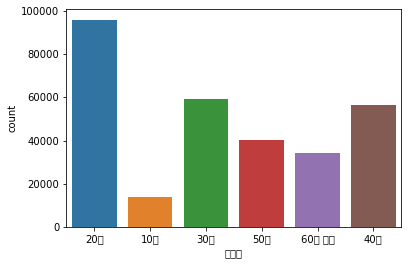

In [8]:
ax = sns.countplot(x="연령대", data=dialect_df)

In [9]:
age_table = dialect_df["연령대"].value_counts().to_frame().T
total_count = sum([int(age_table[col]) for col in age_table.columns])

for col in age_table.columns:
    age_table[col] = float(age_table[col]) / total_count

age_table

,20대,30대,40대,50대,60대 이상,10대
연령대,0.320358,0.197606,0.187695,0.133944,0.113681,0.046716


방언이 사용된 샘플로 한정해 연령대 비중을 계산하면 50대와 60대의 비중이 커지는 것을 확인할 수 있었다. 다만, 그 차이가 크지는 않아 이를 분류에 이용하려면 더 면밀한 질적 탐사가 필요할 듯하다.

아쉽게도 데이터의 노이즈는 전 연령대에 걸쳐 나타나는 듯하다. 연령대를 나누어서 학습하고자 하는 목적이 데이터 노이즈를 줄이는 데 있으므로 이 시도는 의미가 없는 것으로 생각한다.

In [10]:
df["방언"] = df["방언"].str.replace(r"\(\(\)\)", '', regex=True)
df["표준어"] = df["표준어"].str.replace(r"\(\(\)\)", '', regex=True)

df[df["방언"].str.contains("\(\(\)\)")|df["표준어"].str.contains("\(\(\)\)")]

,방언,표준어,연령대,출처 파일


In [11]:
phrase_words = df["방언"].str.extract(r"\(\((.*)\)\)", expand=False).dropna()
for i in phrase_words.index:
    sentence = df.loc[i, "방언"]
    sentence = re.sub(r"\(\(.*\)\)", phrase_words[i], sentence)
    df.loc[i, "방언"] = sentence

phrase_words = df["표준어"].str.extract(r"\(\((.*)\)\)", expand=False).dropna()
for i in phrase_words.index:
    sentence = df.loc[i, "표준어"]
    sentence = re.sub(r"\(\(.*\)\)", phrase_words[i], sentence)
    df.loc[i, "표준어"] = sentence

df.loc[phrase_words.index]

,방언,표준어,연령대,출처 파일
152,그냥 적게 먹고 많이 xx하는 거고 그냥 그렇게 하면은 되는데 진짜 그런 광고 같은...,그냥 적게 먹고 많이 xx하는 거고 그냥 그렇게 하면은 되는데 진짜 그런 광고 같은...,20대,DJDD20000001.json
242,막 포만감도 막 엄청 많지 않으니까 그래서 xx xxx도 나름대로 높아지고,막 포만감도 막 엄청 많지 않으니까 그래서 xx xxx도 나름대로 높아지고,20대,DJDD20000001.json
281,약간 이 생각도 많이 들어,약간 이 생각도 많이 들어,20대,DJDD20000001.json
330,근데 확실히 다이어트 평생 해야xx 느낀 게 우리 엄마도 살이 찌더라고 {laugh...,근데 확실히 다이어트 평생 해야xx 느낀 게 우리 엄마도 살이 찌더라고 {laugh...,20대,DJDD20000001.json
342,나는 다이어트는 진짜 그래도 진짜 아니면 평생 그냥 좀 뚱뚱하고 통통하게 살던가,나는 다이어트는 진짜 그래도 진짜 아니면 평생 그냥 좀 뚱뚱하고 통통하게 살던가,20대,DJDD20000001.json
...,...,...,...,...
1990837,어~ 거의 시내 쪽에서 뭐~~ 콜로세움 뭐~ 그케이케 뭐~ 거기 시내,어~ 거의 시내 쪽에서 뭐~~ 콜로세움 뭐~ 그케이케 뭐~ 거기 시내,50대,DJSX20004850.json
1991374,그게 의지 그래 의지일 수도 있는데,그게 의지 그래 의지일 수도 있는데,50대,DJSX20004851.json
1991423,자기 입장에서도 난감하고 물론 암도다 몇 달 후에,자기 입장에서도 난감하고 물론 암도다 몇 달 후에,50대,DJSX20004851.json
1991464,무슨의미가 있겠느냐 술이야 뭐 쫌 쭐이면서 점점,무슨의미가 있겠느냐 술이야 뭐 조금 쭐이면서 점점,50대,DJSX20004851.json


In [12]:
phrase_words = df["방언"].str.extract(r"\((.*)\)\/\(.*\)", expand=False).dropna()
for i in phrase_words.index:
    sentence = df.loc[i, "방언"]
    sentence = re.sub(r"\(.*\)\/\(.*\)", phrase_words[i], sentence)
    df.loc[i, "방언"] = sentence

phrase_words = df["표준어"].str.extract(r"\(.*\)\/\((.*)\)", expand=False).dropna()
for i in phrase_words.index:
    sentence = df.loc[i, "표준어"]
    sentence = re.sub(r"\(.*\)\/\(.*\)", phrase_words[i], sentence)
    df.loc[i, "표준어"] = sentence

df.loc[phrase_words.index]

,방언,표준어,연령대,출처 파일
176,약간 나는 운동하믄서 스트레스 풀라는 것도 있긴 한데,약간 나는 운동하면서 스트레스 풀라는 것도 있긴 한데,20대,DJDD20000001.json
8812,근데 우리 아빠는 오십 살이냐 그니까 그래서 엄마 더 그런 거 있어.,근데 우리 아빠는 오십 살이잖아 그러니까 그래서 엄마 더 그런 거 있어.,20대,DJDD20000019.json
8841,그리고 엄마도 그 할머니 병원에 이틀 있었다고 서로 스트레스 받아갖고,그리고 엄마도 그 할머니 병원에 이틀 있었다고 서로 스트레스 받아가지고,20대,DJDD20000019.json
9048,엄마가 딱 싫어하는 스타일이여,엄마가 딱 싫어하는 스타일이야,20대,DJDD20000019.json
12284,이십일 편인데 이틀 몰아가꼬 걍 미친듯이 봤단 말야 하아 흡입력 개 쩔어 걍,이십일 편인데 이틀 몰아가지고 그냥 미친듯이 봤단 말야 하아 흡입력 개 쩔어 그냥,20대,DJDD20000028.json
...,...,...,...,...
1991378,멋있어 보이고 그래서 나도 담배 피워볼려고 시도를 해봤는데,멋있어 보이고 그래서 나도 담배 피워보려고 시도를 해봤는데,50대,DJSX20004851.json
1991418,이렇게 또 뇌 이런잉 심근 경색,이렇게 또 뇌 이런응 심근 경색,50대,DJSX20004851.json
1991447,자제할려고 쫌 그렇게 신경을 쓰기는 해.,자제하려고 조금 그렇게 신경을 쓰기는 해.,50대,DJSX20004851.json
1991488,요즘에 다 시국이 시국인지라잉 다,요즘에 다 시국이 시국인지라응 다,50대,DJSX20004851.json


In [13]:
laugh_index = df["방언"].str.contains("\{laughing\}")

df["방언"] = df["방언"].str.replace(r"\{laughing\}", "", regex=True)
df["표준어"] = df["표준어"].str.replace(r"\{laughing\}", "", regex=True)
df[laugh_index]

,방언,표준어,연령대,출처 파일
4,,,20대,DJDD20000001.json
27,약간 거울 봤을 때 약간 내가 괜찮아 보여,약간 거울 봤을 때 약간 내가 괜찮아 보여,20대,DJDD20000001.json
70,그러는 게 제일 쉬우니까,그러는 게 제일 쉬우니까,20대,DJDD20000001.json
71,그게 제일 만만하잖아.,그게 제일 만만하잖아.,20대,DJDD20000001.json
77,그럼 거울 보면서 만족감을 느끼는 거지.,그럼 거울 보면서 만족감을 느끼는 거지.,20대,DJDD20000001.json
...,...,...,...,...
1991939,내 김치 맵다고 아예 맵지 않은 김치를 사서 먹거든 너무 너무 편하고 좋더라,내 김치 맵다고 아예 맵지 않은 김치를 사서 먹거든 너무 너무 편하고 좋더라,50대,DJSX20004853.json
1991946,미쳤다고 그러잖아 그걸 안 맛있어요.,미쳤다고 그러잖아 그걸 안 맛있어요.,50대,DJSX20004853.json
1992042,어떻게 이렇게 같이 살아 주는지 나도 참 대단하다,어떻게 이렇게 같이 살아 주는지 나도 참 대단하다,50대,DJSX20004853.json
1992072,구제 라나 뭐라나 만원 주고 샀다는데 내가 어이가 없어 한참 웃었다 야,구제 라나 뭐라나 만원 주고 샀다는데 내가 어이가 없어 한참 웃었다 야,50대,DJSX20004853.json


In [14]:
is_empty_dialect = np.where(df["방언"] == '', True, False).tolist()
is_empty_standard = np.where(df["표준어"] == '', True, False).tolist()
is_empty = [dia or sta for dia, sta in zip(is_empty_dialect, is_empty_standard)]

empty_index = df.loc[is_empty].index
df = df.drop(empty_index)

In [15]:
stutter_sentence = df["방언"].str.contains(r"\-.*\-", regex=True)
df["방언"] = df["방언"].str.replace(r"\-.*\-", "", regex=True)
df["표준어"] = df["표준어"].str.replace(r"\-.*\-", "", regex=True)

df.loc[stutter_sentence]

,방언,표준어,연령대,출처 파일
115,근데 어쩔 수 없이 해야지 약간 이런 생각 때문에 했는데 나는 솔직히 피티가 더 ...,근데 어쩔 수 없이 해야지 약간 이런 생각 때문에 했는데 나는 솔직히 피티가 더 ...,20대,DJDD20000001.json
209,아 진짜로 그런 경우도 많이 봤어.,아 진짜로 그런 경우도 많이 봤어.,20대,DJDD20000001.json
387,그 근육 늘리기가 진짜 힘들더라고,그 근육 늘리기가 진짜 힘들더라고,20대,DJDD20000001.json
455,맞어 맞어 나도 사실 막 연애를 보면서 진짜 완전 불타오르는 사랑 그런 거 해가지고,맞어 맞어 나도 사실 막 연애를 보면서 진짜 완전 불타오르는 사랑 그런 거 해가지고,20대,DJDD20000002.json
458,아 연애 저렇게 연애하면 진짜 다 죽어나가겠구나 약간 이 생각 했어.,아 연애 저렇게 연애하면 진짜 다 죽어나가겠구나 약간 이 생각 했어.,20대,DJDD20000002.json
...,...,...,...,...
1991880,본인이 끓였대 그래서 뭐 미역국에다가 북어를 넣어서,본인이 끓였대 그래서 뭐 미역국에다가 북어를 넣어서,50대,DJSX20004853.json
1991889,예전에 안 좋았던 기억에 좀 많이 있어 가지고,예전에 안 좋았던 기억에 좀 많이 있어 가지고,50대,DJSX20004853.json
1991956,점심때도 너무 늦게 좀 일하다 보니까 너무 늦게 나와 가지고,점심때도 너무 늦게 좀 일하다 보니까 너무 늦게 나와 가지고,50대,DJSX20004853.json
1991960,그렇게 기다리고 있었던 거 아니야?,그렇게 기다리고 있었던 거 아니야?,50대,DJSX20004853.json


## 대체어 처리

회사이름, 학교이름, 사람이름과 같은 고유명사가 '&name1&'와 같은 형태의 대체어로 등장한다. 이들은 미리 처리할 필요가 있다.

In [ ]:
대체어_위치_방언 = df["방언"].str.contains(r"\&\S+[0-9]\&", regex=True)
대체어_위치_표준어 = df["표준어"].str.contains(r"\&\S+[0-9]\&", regex=True)

In [58]:
대체어_목록 = []
for row in df[대체어_위치_방언]["방언"]:
    results = re.search(r"\&([a-z|!-/]+)[0-9]\&", row)
    if results:
        for i in range(results.lastindex):
            대체어_목록.append(results.groups(i + 1))

print(set(대체어_목록))

{('address',), ('company-name',), ('name',), ('companyname',)}


In [59]:
for row in df[대체어_위치_방언]["표준어"]:
    results = re.search(r"\&([a-z|!-/]+)[0-9]\&", row)
    if results:
        for i in range(results.lastindex):
            대체어_목록.append(results.groups(i + 1))

print(set(대체어_목록))

{('address',), ('company-name',), ('name',), ('companyname',)}


네 가지 종류의 대체어가 등장하는 것을 확인했다.

In [61]:
df["방언"] = df["방언"].str.replace(r"\&name[0-9]\&", "name", regex=True)
df["방언"] = df["방언"].str.replace(r"\&address[0-9]\&", "address", regex=True)
df["방언"] = df["방언"].str.replace(r"\&company-name[0-9]\&", "companyname", regex=True)
df["방언"] = df["방언"].str.replace(r"\&companyname[0-9]\&", "companyname", regex=True)

df[대체어_위치_방언]

,방언,표준어,연령대,출처 파일,길이
170,어 name 야 너 엄청 많이 살 빠졌다 그러면,어 &name1& 야 너 엄청 많이 살 빠졌다 그러면,20대,DJDD20000001.json,9
172,엄청 행복한데 막 옆에서 어느 순간부터 name 야 너 왜 살이 안 빠지냐,엄청 행복한데 막 옆에서 어느 순간부터 &name1& 야 너 왜 살이 안 빠지냐,20대,DJDD20000001.json,13
210,근데 나는 name 이랑 같이 다녔을 때랑 우리끼리 내기 해 가지고 막 하니까,근데 나는 &name2& 이랑 같이 다녔을 때랑 우리끼리 내기 해 가지고 막 하니까,20대,DJDD20000001.json,13
339,name 너는 왜케 막 그런 식으로 나한테 꼽을 주니까,&name1& 너는 왜케 막 그런 식으로 나한테 꼽을 주니까,20대,DJDD20000001.json,9
403,그래가지고 companyname가 겁나 뜬 거잖아.,그래가지고 &company-name1&가 겁나 뜬 거잖아.,20대,DJDD20000001.json,5
...,...,...,...,...,...
1991116,계획을 세우고 있거든요 그럼 name씨는 이번 명절에 가까운 데 뭐 여행 같은 계획...,계획을 세우고 있거든요 그럼 &name1&씨는 이번 명절에 가까운 데 뭐 여행 같은...,50대,DJSX20004850.json,17
1991674,그 아이들한테 했었는데 펀드는 어~ 우리 name님 말씀마따나,그 아이들한테 했었는데 펀드는 어~ 우리 &name1&님 말씀처럼,50대,DJSX20004852.json,8
1991683,근데 저는 name님처럼,근데 저는 &name1&님처럼,50대,DJSX20004852.json,3
1992000,name이 안 그래도 name이가,&name1&이 안 그래도 &name1&이가,50대,DJSX20004853.json,4


In [62]:
df["표준어"] = df["표준어"].str.replace(r"\&name[0-9]\&", "name", regex=True)
df["표준어"] = df["표준어"].str.replace(r"\&address[0-9]\&", "address", regex=True)
df["표준어"] = df["표준어"].str.replace(r"\&company-name[0-9]\&", "companyname", regex=True)
df["표준어"] = df["표준어"].str.replace(r"\&companyname[0-9]\&", "companyname", regex=True)

df[대체어_위치_표준어]

,방언,표준어,연령대,출처 파일,길이
170,어 name 야 너 엄청 많이 살 빠졌다 그러면,어 name 야 너 엄청 많이 살 빠졌다 그러면,20대,DJDD20000001.json,9
172,엄청 행복한데 막 옆에서 어느 순간부터 name 야 너 왜 살이 안 빠지냐,엄청 행복한데 막 옆에서 어느 순간부터 name 야 너 왜 살이 안 빠지냐,20대,DJDD20000001.json,13
210,근데 나는 name 이랑 같이 다녔을 때랑 우리끼리 내기 해 가지고 막 하니까,근데 나는 name 이랑 같이 다녔을 때랑 우리끼리 내기 해 가지고 막 하니까,20대,DJDD20000001.json,13
339,name 너는 왜케 막 그런 식으로 나한테 꼽을 주니까,name 너는 왜케 막 그런 식으로 나한테 꼽을 주니까,20대,DJDD20000001.json,9
403,그래가지고 companyname가 겁나 뜬 거잖아.,그래가지고 companyname가 겁나 뜬 거잖아.,20대,DJDD20000001.json,5
...,...,...,...,...,...
1991116,계획을 세우고 있거든요 그럼 name씨는 이번 명절에 가까운 데 뭐 여행 같은 계획...,계획을 세우고 있거든요 그럼 name씨는 이번 명절에 가까운 데 뭐 여행 같은 계획...,50대,DJSX20004850.json,17
1991674,그 아이들한테 했었는데 펀드는 어~ 우리 name님 말씀마따나,그 아이들한테 했었는데 펀드는 어~ 우리 name님 말씀처럼,50대,DJSX20004852.json,8
1991683,근데 저는 name님처럼,근데 저는 name님처럼,50대,DJSX20004852.json,3
1992000,name이 안 그래도 name이가,name이 안 그래도 name이가,50대,DJSX20004853.json,4


## 데이터 정제

공백 토큰 길이가 4 이하인 짧은 문장은 학습/테스트에서 제거

In [63]:
df["길이"] = [min(len(dia.split()), len(stan.split())) for dia, stan in zip(df["방언"], df["표준어"])]
df["길이"]

0           5
1           1
2          11
3          12
5          17
           ..
1992096     7
1992097     8
1992098     9
1992099    11
1992100     7
Name: 길이, Length: 1988648, dtype: int64

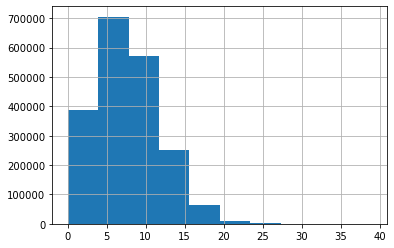

In [64]:
ax = df["길이"].hist()

In [65]:
df[df["길이"] <= 4]

,방언,표준어,연령대,출처 파일,길이
1,하,하,20대,DJDD20000001.json,1
9,도저히 할 수가 없어.,도저히 할 수가 없어.,20대,DJDD20000001.json,4
10,밥을 너무 먹고 싶어.,밥을 너무 먹고 싶어.,20대,DJDD20000001.json,4
11,그래서 못 해,그래서 못 해,20대,DJDD20000001.json,3
12,다이어트 너무 어려워 그래서,다이어트 너무 어려워 그래서,20대,DJDD20000001.json,4
...,...,...,...,...,...
1992017,코로나가 뭐시고 간에 그냥,코로나가 뭐시고 간에 그냥,50대,DJSX20004853.json,4
1992031,이렇게 수다라도,이렇게 수다라도,50대,DJSX20004853.json,2
1992034,남편 사업,남편 사업,50대,DJSX20004853.json,2
1992086,안 좋아져 가지고,안 좋아져 가지고,50대,DJSX20004853.json,3


In [66]:
suf_len_df = df[df["길이"] > 4]
len(suf_len_df)

1436998

무려 55만 쌍이 공백 토큰화 길이 기준 4보다 짧았다. 이들을 제외하고 약 143만 쌍의 데이터가 남았다.

In [67]:
suf_len_df[suf_len_df["방언"] != suf_len_df["표준어"]]

,방언,표준어,연령대,출처 파일,길이
15,이제 나 혼자 식단을 하기에는 너무 힘들고 옆에 또 맛있는 냄새가 나니까 인제 나는...,이제 나 혼자 식단을 하기에는 너무 힘들고 옆에 또 맛있는 냄새가 나니까 이제 나는...,20대,DJDD20000001.json,23
18,그라믄 나는 뭐 어떡해 그래서 옆에서 막 부추긴다?,그러면 나는 뭐 어떡해 그래서 옆에서 막 부추긴다?,20대,DJDD20000001.json,8
21,나도 근데 인제 다이어트를 딱 시작한다고 마음을 먹었는데 옆에서 그 자꾸 그렇게 먹...,나도 근데 이제 다이어트를 딱 시작한다고 마음을 먹었는데 옆에서 그 자꾸 그렇게 먹...,20대,DJDD20000001.json,18
23,아 오늘까지만 먹어야지 하고 인제 또 왕창 먹어 버리니까 계속 이게 반복되면서 인제...,아 오늘까지만 먹어야지 하고 이제 또 왕창 먹어 버리니까 계속 이게 반복되면서 이제...,20대,DJDD20000001.json,17
32,약간 옷으로 가려지는 것도 있고 좀 앵간해 보이니까 못한다고 그거를,약간 옷으로 가려지는 것도 있고 좀 어지간히 보이니까 못한다고 그거를,20대,DJDD20000001.json,10
...,...,...,...,...,...
1991849,코로나 때문에 인제 계속 비대면 수업이 너무 장기화 되다 보니까 저희,코로나 때문에 이제 계속 비대면 수업이 너무 장기화 되다 보니까 저희,50대,DJSX20004852.json,11
1991860,우리 학교 학 긍께 학교의,우리 학교 학 그러니까 학교의,50대,DJSX20004852.json,5
1991866,일년은 쫌더 지켜봐야 될 거 아무래 어~,일년은 조금 더 지켜봐야 될 거 아무래 어~,50대,DJSX20004852.json,7
1991903,그껴 보면 좋을 것 같은디,그껴 보면 좋을 것 같은데,50대,DJSX20004853.json,5


짧은 문장을 제거하기 전에는 약 30만 쌍이었던 방언 샘플이 제외 후 25만 쌍으로 줄었다.

In [68]:
suf_len_df.to_csv("../datas/output/jeonla_dialect_data_age_processed.csv")

## 데이터 표본 추출

143만 개의 데이터는 너무 많으며 그 중 25만 개 가량의 방언이 담긴 것이 분명한 데이터만이 모델에게 중요하게 가르쳐야 할 대상이다. 따라서 이전에는 광범위한 언어 학습을 위해 방언 데이터와 동일한 수의 표준어 데이터를 추출해 약 60만 쌍의 학습 데이터를 구성한 바 있다.

이번에도 동일하게 방언 데이터와 표준어 데이터를 동수로 하여 데이터를 구성하도록 한다.

In [69]:
dial_df = suf_len_df[suf_len_df["방언"] != suf_len_df["표준어"]]
stan_df = suf_len_df[suf_len_df["방언"] == suf_len_df["표준어"]]

<AxesSubplot:>

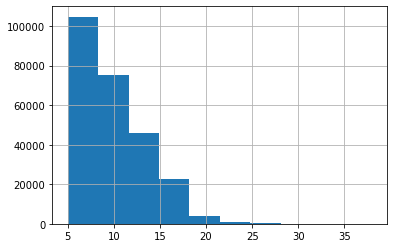

In [70]:
dial_df["길이"].hist()

c:\Users\wnsgh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wnsgh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wnsgh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wnsgh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wnsgh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


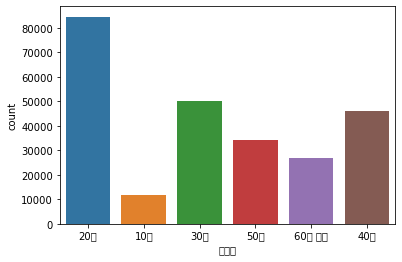

In [71]:
ax = sns.countplot(x="연령대", data=dial_df)

<AxesSubplot:>

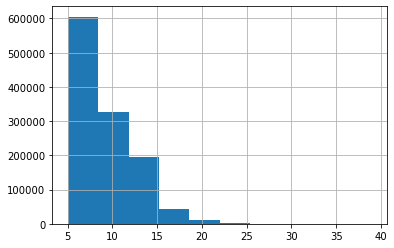

In [72]:
stan_df["길이"].hist()

c:\Users\wnsgh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wnsgh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wnsgh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wnsgh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wnsgh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


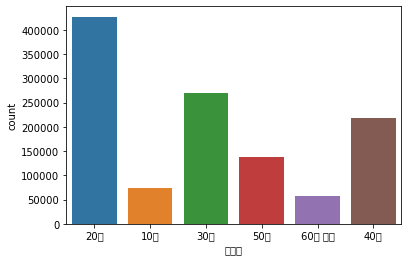

In [73]:
ax = sns.countplot(x="연령대", data=stan_df)

In [74]:
stan_sample = stan_df.sample(len(dial_df))
stan_sample

,방언,표준어,연령대,출처 파일,길이
863913,그런데 삼성 예를 들어 삼성하고 엘지랑 비교했을 때 보면,그런데 삼성 예를 들어 삼성하고 엘지랑 비교했을 때 보면,30대,DJDG20002134.json,9
1117231,수지 나오고 남주혁 나오는 드라마에 나오거든?,수지 나오고 남주혁 나오는 드라마에 나오거든?,40대,DJSX20001133.json,6
421992,아니 나는 거기는 아니고 화당에가 있어요,아니 나는 거기는 아니고 화당에가 있어요,50대,DJDD20001681.json,6
1718208,대표적인 예로 어~ 부모님 전상서,대표적인 예로 어~ 부모님 전상서,40대,DJSX20003716.json,5
1940623,생긴 걸로 저는 알고 있습니다 뭐 젊었을 때는 괜찮지만 나이 들수록,생긴 걸로 저는 알고 있습니다 뭐 젊었을 때는 괜찮지만 나이 들수록,50대,DJSX20004644.json,11
...,...,...,...,...,...
60025,선후배들한테 그렇게 아낌없이 돈을 쓰면서 그렇게 한다는 게,선후배들한테 그렇게 아낌없이 돈을 쓰면서 그렇게 한다는 게,10대,DJDD20000150.json,8
1440092,하지만 나의 나의 남편은 돈 벌어오는 거 꼴랑 그거 하나해.,하지만 나의 나의 남편은 돈 벌어오는 거 꼴랑 그거 하나해.,40대,DJSX20002522.json,10
1824779,때 당신이 삐삐 같은 거 공중전화였잖아.,때 당신이 삐삐 같은 거 공중전화였잖아.,40대,DJSX20004140.json,6
568318,그러고 뭐~ 바뀐 거 있는지도 모르겠어 그리구 나는 일단 너무 짜증 나는 게,그러고 뭐~ 바뀐 거 있는지도 모르겠어 그리구 나는 일단 너무 짜증 나는 게,20대,DJDG20000761.json,13


In [76]:
sampled_df = pd.concat([dial_df, stan_sample])
sampled_df

,방언,표준어,연령대,출처 파일,길이
15,이제 나 혼자 식단을 하기에는 너무 힘들고 옆에 또 맛있는 냄새가 나니까 인제 나는...,이제 나 혼자 식단을 하기에는 너무 힘들고 옆에 또 맛있는 냄새가 나니까 이제 나는...,20대,DJDD20000001.json,23
18,그라믄 나는 뭐 어떡해 그래서 옆에서 막 부추긴다?,그러면 나는 뭐 어떡해 그래서 옆에서 막 부추긴다?,20대,DJDD20000001.json,8
21,나도 근데 인제 다이어트를 딱 시작한다고 마음을 먹었는데 옆에서 그 자꾸 그렇게 먹...,나도 근데 이제 다이어트를 딱 시작한다고 마음을 먹었는데 옆에서 그 자꾸 그렇게 먹...,20대,DJDD20000001.json,18
23,아 오늘까지만 먹어야지 하고 인제 또 왕창 먹어 버리니까 계속 이게 반복되면서 인제...,아 오늘까지만 먹어야지 하고 이제 또 왕창 먹어 버리니까 계속 이게 반복되면서 이제...,20대,DJDD20000001.json,17
32,약간 옷으로 가려지는 것도 있고 좀 앵간해 보이니까 못한다고 그거를,약간 옷으로 가려지는 것도 있고 좀 어지간히 보이니까 못한다고 그거를,20대,DJDD20000001.json,10
...,...,...,...,...,...
60025,선후배들한테 그렇게 아낌없이 돈을 쓰면서 그렇게 한다는 게,선후배들한테 그렇게 아낌없이 돈을 쓰면서 그렇게 한다는 게,10대,DJDD20000150.json,8
1440092,하지만 나의 나의 남편은 돈 벌어오는 거 꼴랑 그거 하나해.,하지만 나의 나의 남편은 돈 벌어오는 거 꼴랑 그거 하나해.,40대,DJSX20002522.json,10
1824779,때 당신이 삐삐 같은 거 공중전화였잖아.,때 당신이 삐삐 같은 거 공중전화였잖아.,40대,DJSX20004140.json,6
568318,그러고 뭐~ 바뀐 거 있는지도 모르겠어 그리구 나는 일단 너무 짜증 나는 게,그러고 뭐~ 바뀐 거 있는지도 모르겠어 그리구 나는 일단 너무 짜증 나는 게,20대,DJDG20000761.json,13


In [77]:
sampled_df = sampled_df.sample(frac=1).reset_index(drop=True) # 새로 샘플한 dataframe을 셔플
sampled_df

,방언,표준어,연령대,출처 파일,길이
0,막상 완전 돈이 급하게 필요한 것도 아니라서 그냥 용돈벌이 정도로만 할려고 생각을 ...,막상 완전 돈이 급하게 필요한 것도 아니라서 그냥 용돈벌이 정도로만 하려고 생각을 ...,20대,DJSX20002683.json,15
1,좋은 추억이 있어가지고 다시 키운다면 진돗개를 키우고 싶고,좋은 추억이 있어가지고 다시 키운다면 진돗개를 키우고 싶고,30대,DJDG20002125.json,8
2,쫌 보면 인제 세계 인제,조금 보면 인제 세계 인제,30대,DJSX20004304.json,5
3,가시나들 있으니까 뭐~ 일부러 뭐~ 쫌 져주는 척 또 한다고 그랬는진 모르겄는디,계집아이들 있으니까 뭐~ 일부러 뭐~ 조금 져주는 척 또 한다고 그랬는진 모르겠는데,20대,DJDG20001833.json,12
4,거기서 어 저 새끼 왜 미니언 안 먹는데 씨 때려야지 이러지는 않잖아,거기서 어 저 새끼 왜 미니언 안 먹는데 씨 때려야지 이러지는 않잖아,20대,DJDD20000034.json,12
...,...,...,...,...,...
508409,그~ 마음이나 생각이 조금 달라지나 봐,그~ 마음이나 생각이 조금 달라지나 봐,40대,DJSX20004708.json,6
508410,우리는 그 절에 가서 빌 수 있다는 것 내가 건강하기 때문에,우리는 그 절에 가서 빌 수 있다는 것 내가 건강하기 때문에,60대 이상,DJSX20004083.json,11
508411,방구석에 이케 이케 이불 뒤집고 이렇게 오열을 했었었는데,방구석에 이렇게 이렇게 이불 뒤집고 이렇게 오열을 했었었는데,20대,DJDG20001151.json,8
508412,뭐 없던 원래 없던 꿈도 아니라 이제 한창,뭐 없던 원래 없던 꿈도 아니라 이제 한창,20대,DJSX20000555.json,8


In [78]:
sampled_df.to_csv("../datas/output/jeonla_dialect_data_age_sampled.csv")

## 형태소 토큰화

이번 실험에서는 서로 다른 토큰화를 사용했을 때 모델 성능이 어떻게 변화하는지를 살펴보고자 한다. 이 토큰화는 데이터셋 전체에 대해 일괄적으로 처리하여 모델에서는 단순히 공백 토큰으로 사용할 수 있도록 처리함으로 전처리 단계에서 토큰화를 수행한다.

In [20]:
import MeCab

def pos(sentence: str):
    """한국어 토큰을 분리합니다. 토큰과 품사를 튜플 리스트로 반환합니다.
        
        매개변수:
            sentence (str): 토큰화할 문장 
        반환값:
            token list (list[tuple]): 토큰과 품사 리스트
    """
    t = MeCab.Tagger()
    tag_result = t.parse(sentence)
    tag_result = tag_result.replace("\t", ".@!").replace("\n", ".@!").split(".@!")
    tag_word = tag_result[::2][:-1] # 마지막 EOS는 자른다
    tag_info = tag_result[1::2][:-1] # 마지막 EOS는 자른다
    return [(word, info.split(',')[0]) for word, info in zip(tag_word, tag_info)]

def morphs(sentence: str):
    """한국어 토큰을 분리합니다. 토큰의 리스트를 반환합니다.
        
        매개변수:
            sentence (str): 토큰화할 문장 
        반환값:
            token list (list): 토큰 리스트
    """
    t = MeCab.Tagger()
    tag_result = t.parse(sentence)
    tag_result = tag_result.replace("\t", ".@!").replace("\n", ".@!").split(".@!")
    return tag_result[::2][:-1]

def space_tokenize(original_sentence, token_list):
    """
    문장을 decode할 때 한국어의 띄어쓰기도 되살릴 수 있도록 token에 이를 반영하도록 처리하는 함수
    """
    
    space_token = original_sentence.split()

    if len(space_token) == 0:
        return token_list

    token_idx = 0
    cur_token = space_token[token_idx]
    cum_word = ""
    for i, word in enumerate(token_list):
        cum_word += word

        if len(cum_word) > len(word):
            token_list[i] = "##" + token_list[i]
            
        if cum_word == cur_token:
            token_idx += 1
            cum_word = ""
            cur_token = space_token[min(token_idx, len(space_token) - 1)]
    
    return token_list

def morph_and_preprocess(sentence: str):
    """한국어 토큰을 분리하고 전처리합니다. 토큰의 리스트를 반환합니다.
        
        매개변수:
            sentence (str): 토큰화할 문장 
        반환값:
            token list (list): 토큰 리스트
    """
    
    pos_result = pos(sentence)
    word_list = [word for word, _ in pos_result]
    word_list = space_tokenize(sentence, word_list) # 공백 복원 토큰화
    
    return word_list

In [28]:
sentence = "사람들이 그 팔로우가 쩍긴 해도"
token_list = morphs(sentence)
print(token_list)
token_list = morph_and_preprocess(sentence)
print(token_list)

['사람', '들', '이', '그', '팔로우', '가', '쩍', '긴', '해도']
['사람', '##들', '##이', '그', '팔로우', '##가', '쩍', '##긴', '해도']


In [79]:
dialect_list = sampled_df["방언"].to_list()
dialect_list = list(map(morph_and_preprocess, dialect_list))

In [80]:
standard_list = sampled_df["표준어"].to_list()
standard_list = list(map(morph_and_preprocess, standard_list))

In [81]:
list_to_spaced_sentence = lambda li : " ".join(li)
sampled_df["방언"] = list(map(list_to_spaced_sentence, dialect_list))
sampled_df["표준어"] = list(map(list_to_spaced_sentence, standard_list))

sampled_df.head()

,방언,표준어,연령대,출처 파일,길이
0,막상 완전 돈 ##이 급하 ##게 필요 ##한 것 ##도 아니 ##라서 그냥 용돈 ...,막상 완전 돈 ##이 급하 ##게 필요 ##한 것 ##도 아니 ##라서 그냥 용돈 ...,20대,DJSX20002683.json,15
1,좋 ##은 추억 ##이 있 ##어 ##가지 ##고 다시 키운다면 진돗개 ##를 키우...,좋 ##은 추억 ##이 있 ##어 ##가지 ##고 다시 키운다면 진돗개 ##를 키우...,30대,DJDG20002125.json,8
2,쫌 보 ##면 인제 세계 인제,조금 보 ##면 인제 세계 인제,30대,DJSX20004304.json,5
3,가시나 ##들 있 ##으니까 뭐 ##~ 일부러 뭐 ##~ 쫌 져 ##주 ##는 척 ...,계집아이 ##들 있 ##으니까 뭐 ##~ 일부러 뭐 ##~ 조금 져 ##주 ##는 ...,20대,DJDG20001833.json,12
4,거기 ##서 어 저 새끼 왜 미니언 안 먹 ##는데 씨 때려 ##야지 이러 ##지 ...,거기 ##서 어 저 새끼 왜 미니언 안 먹 ##는데 씨 때려 ##야지 이러 ##지 ...,20대,DJDD20000034.json,12


In [83]:
sampled_df.to_csv("../datas/output/jeonla_dialect_data_형태소.csv")

## 테스트셋 처리

같은 전처리를 테스트셋에 대해서도 수행하도록 한다.

In [8]:
df = pd.read_csv("../datas/output/jeonla_dialect_test_age.csv", index_col=0)
df

,방언,표준어,연령대,출처 파일
0,나는 회사 학교의 이야기를 하고 싶어 형은 있잖아요 친구들 같은 거 다 동창 친구들...,나는 회사 학교의 이야기를 하고 싶어 형은 있잖아요 친구들 같은 거 다 동창 친구들...,20대,DJDD20000247.json
1,다 동창회지.,다 동창회지.,20대,DJDD20000247.json
2,동창 친구들은 이제 초등학교 때부터 친구인 거예요?,동창 친구들은 이제 초등학교 때부터 친구인 거예요?,20대,DJDD20000247.json
3,음 (()) 친구들은 거의 이제 초등학교?,음 (()) 친구들은 거의 이제 초등학교?,20대,DJDD20000247.json
4,이렇게 친구인 애 있고 중학교에도 친구들 있고 한데 근데 형은 솔직히 말하면 그거 있잖아,이렇게 친구인 애 있고 중학교에도 친구들 있고 한데 근데 형은 솔직히 말하면 그거 있잖아,20대,DJDD20000247.json
...,...,...,...,...
275132,그래도 아 기대된다.,그래도 아 기대된다.,30대,DJSX20003150.json
275133,이 천 이 십 칠 년이 이 천 이 십 칠 년에,이 천 이 십 칠 년이 이 천 이 십 칠 년에,30대,DJSX20003150.json
275134,근데 발표를 한다고 해서 이게 딱,근데 발표를 한다고 해서 이게 딱,30대,DJSX20003150.json
275135,나올 나올라나?,나올 나오려나?,30대,DJSX20003150.json


c:\Users\wnsgh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wnsgh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wnsgh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wnsgh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\wnsgh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


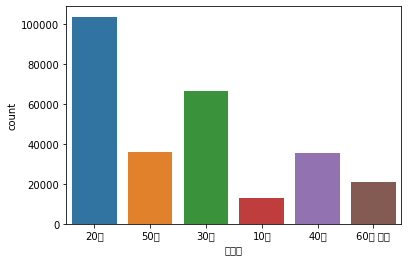

In [3]:
ax = sns.countplot(x="연령대", data=df)

In [5]:
age_table = df["연령대"].value_counts().to_frame().T
total_count = sum([int(age_table[col]) for col in age_table.columns])

for col in age_table.columns:
    age_table[col] = float(age_table[col]) / total_count

age_table

,20대,30대,50대,40대,60대 이상,10대
연령대,0.376295,0.241317,0.130572,0.128663,0.076512,0.046641


In [9]:
df[df["연령대"].isna()]

,방언,표준어,연령대,출처 파일
47166,그래도 며느리는 맛있다고 부르면 맛있지 이것도 먹어봐 맛있지 인자 하고 하는데,그래도 며느리는 맛있다고 부르면 맛있지 이것도 먹어봐 맛있지 이제 하고 하는데,NaN,DJDD20001014.json
54448,그러면서 육 개월에 한 번씩 세입자가 바뀌니까 이제 왠지 뭔가 불안하더라고요.,그러면서 육 개월에 한 번씩 세입자가 바뀌니까 이제 왠지 뭔가 불안하더라고요.,NaN,DJDD20001035.json
65495,전염병이 아니고 그냥 일반 무슨,전염병이 아니고 그냥 일반 무슨,NaN,DJDD20001079.json
65496,다른 거면은 이제 치료만 하면 끝나지만,다른 거면은 이제 치료만 하면 끝나지만,NaN,DJDD20001079.json
65497,공기 전염돼 가지고 돌고돌아서 그래서 걱정인데요,공기 전염돼 가지고 돌고돌아서 그래서 걱정인데요,NaN,DJDD20001079.json
65498,저번에 그 아는 엄마도 그러더라고 애가 고 삼 인데,저번에 그 아는 엄마도 그러더라고 애가 고 삼 인데,NaN,DJDD20001079.json
65499,고삼 엄마가 제일 힘들다고,고삼 엄마가 제일 힘들다고,NaN,DJDD20001079.json
66838,죽었다고 얘기만 하고 그게 끝이어가지고 그뒤로는,죽었다고 얘기만 하고 그게 끝이어가지고 그뒤로는,NaN,DJDD20001083.json
80097,그런데 이제 일흔 살의 양쪽다 무릎에 그게 수술을 앞두고 수술 해 가지고 지금은 잘...,그런데 이제 일흔 살의 양쪽다 무릎에 그게 수술을 앞두고 수술 해 가지고 지금은 잘...,NaN,DJDD20001761.json
80098,그런데 저희 친정엄마 는 한 일흔다섯의하신 것 같아요.,그런데 저희 친정엄마 는 한 일흔다섯의하신 것 같아요.,NaN,DJDD20001761.json


In [10]:
df["방언"] = df["방언"].str.replace(r"\(\(\)\)", '', regex=True)
df["표준어"] = df["표준어"].str.replace(r"\(\(\)\)", '', regex=True)

phrase_words = df["방언"].str.extract(r"\(\((.*)\)\)", expand=False).dropna()
for i in phrase_words.index:
    sentence = df.loc[i, "방언"]
    sentence = re.sub(r"\(\(.*\)\)", phrase_words[i], sentence)
    df.loc[i, "방언"] = sentence

phrase_words = df["표준어"].str.extract(r"\(\((.*)\)\)", expand=False).dropna()
for i in phrase_words.index:
    sentence = df.loc[i, "표준어"]
    sentence = re.sub(r"\(\(.*\)\)", phrase_words[i], sentence)
    df.loc[i, "표준어"] = sentence

phrase_words = df["방언"].str.extract(r"\((.*)\)\/\(.*\)", expand=False).dropna()
for i in phrase_words.index:
    sentence = df.loc[i, "방언"]
    sentence = re.sub(r"\(.*\)\/\(.*\)", phrase_words[i], sentence)
    df.loc[i, "방언"] = sentence

phrase_words = df["표준어"].str.extract(r"\(.*\)\/\((.*)\)", expand=False).dropna()
for i in phrase_words.index:
    sentence = df.loc[i, "표준어"]
    sentence = re.sub(r"\(.*\)\/\(.*\)", phrase_words[i], sentence)
    df.loc[i, "표준어"] = sentence

laugh_index = df["방언"].str.contains("\{laughing\}")

df["방언"] = df["방언"].str.replace(r"\{laughing\}", "", regex=True)
df["표준어"] = df["표준어"].str.replace(r"\{laughing\}", "", regex=True)

is_empty_dialect = np.where(df["방언"] == '', True, False).tolist()
is_empty_standard = np.where(df["표준어"] == '', True, False).tolist()
is_empty = [dia or sta for dia, sta in zip(is_empty_dialect, is_empty_standard)]

empty_index = df.loc[is_empty].index
df = df.drop(empty_index)

stutter_sentence = df["방언"].str.contains(r"\-.*\-", regex=True)
df["방언"] = df["방언"].str.replace(r"\-.*\-", "", regex=True)
df["표준어"] = df["표준어"].str.replace(r"\-.*\-", "", regex=True)

df.loc[stutter_sentence]

,방언,표준어,연령대,출처 파일
15,축제 때는 뭐 재밌고 마 여자친구 사귀고 재밌었지 지금 돌아가라하면 진짜 돌아가서 ...,축제 때는 뭐 재밌고 마 여자친구 사귀고 재밌었지 지금 돌아가라하면 진짜 돌아가서 ...,20대,DJDD20000247.json
20,동아리 여러 가지 들어가지고 술 마시고 막 놀면서 인맥 쌓고,동아리 여러 가지 들어가지고 술 마시고 막 놀면서 인맥 쌓고,20대,DJDD20000247.json
37,또 운동 운동 엄청 열심히 하고 같이 이제 끝나고 술 한잔하는 것도 막 재밌었고,또 운동 운동 엄청 열심히 하고 같이 이제 끝나고 술 한잔하는 것도 막 재밌었고,20대,DJDD20000247.json
39,여행 동아리도 어차피 어차피 많이 다니고 뭐 동아리 기승전결이 술이지만 기승전 술이지만,여행 동아리도 어차피 어차피 많이 다니고 뭐 동아리 기승전결이 술이지만 기승전 술이지만,20대,DJDD20000247.json
40,그래도 한번 그렇게 해보고 싶었어 다니고 사진 동아리 진짜 진짜 하고 싶었고,그래도 한번 그렇게 해보고 싶었어 다니고 사진 동아리 진짜 진짜 하고 싶었고,20대,DJDD20000247.json
...,...,...,...,...
269900,오늘 했는데 오늘 안되면,오늘 했는데 오늘 안되면,20대,DJSX20003127.json
270042,그리고 하기 나름이야 휴가를 많이 받으면 올해는 삼십 일 이나 육십 일 인가 기억...,그리고 하기 나름이야 휴가를 많이 받으면 올해는 삼십 일 이나 육십 일 인가 기억...,20대,DJSX20003129.json
270108,이제는 부끄러워 남 부끄러워 갖고,이제는 부끄러워 남 부끄러워 갖고,20대,DJSX20003129.json
273438,그라제 지금은 생각도 못하제.,그러지 지금은 생각도 못하지.,60대 이상,DJSX20003143.json


In [11]:
대체어_위치_방언 = df["방언"].str.contains(r"\&\S+[0-9]\&", regex=True)
대체어_위치_표준어 = df["표준어"].str.contains(r"\&\S+[0-9]\&", regex=True)

In [12]:
df["방언"] = df["방언"].str.replace(r"\&name[0-9]\&", "name", regex=True)
df["방언"] = df["방언"].str.replace(r"\&address[0-9]\&", "address", regex=True)
df["방언"] = df["방언"].str.replace(r"\&company-name[0-9]\&", "companyname", regex=True)
df["방언"] = df["방언"].str.replace(r"\&companyname[0-9]\&", "companyname", regex=True)

df[대체어_위치_방언]

,방언,표준어,연령대,출처 파일
77,와 근데 재밌는 게 또 제 name이 그 사회대 사람이었잖아요,와 근데 재밌는 게 또 제 &name1&이 그 사회대 사람이었잖아요,20대,DJDD20000247.json
194,약간 신입생 킬러 이런 거 였는데 그때 name?,약간 신입생 킬러 이런 거 였는데 그때 &name2&?,20대,DJDD20000247.json
201,이제 name 형이랑 막 name 형이랑 이케 막 항상 그랬잖아요 약간 그런 것도 ...,이제 &name3& 형이랑 막 &name4& 형이랑 이렇게 막 항상 그랬잖아요 약간...,20대,DJDD20000247.json
210,또 과 건들면 또 name가 형한테 말했거든 형 과 사귀면 좋긴한데,또 과 건들면 또 &name5&가 형한테 말했거든 형 과 사귀면 좋긴한데,20대,DJDD20000247.json
215,갖고 한 번 한 번 누가 그랬던 거 같애 name이었나?,갖고 한 번 한 번 누가 그랬던 거 같애 &name6&이었나?,20대,DJDD20000247.json
...,...,...,...,...
274347,언니들 막 책 좋아하잖아 name언니랑,언니들 막 책 좋아하잖아 &name5&언니랑,30대,DJSX20003146.json
274348,음 name 언니는 근데,음 &name6& 언니는 근데,30대,DJSX20003146.json
274349,어 그 언니들은 정말로 날 새면서 name언니 같은 경우에는 책 한 권에 꽃히면 날...,어 그 언니들은 정말로 날 새면서 &name5&언니 같은 경우에는 책 한 권에 꽃히...,30대,DJSX20003146.json
275090,그래야 되니까 companyname 자율 주행 차 고속도로를 달린다.,그래야 되니까 &company-name1& 자율 주행 차 고속도로를 달린다.,30대,DJSX20003150.json


In [13]:
df["표준어"] = df["표준어"].str.replace(r"\&name[0-9]\&", "name", regex=True)
df["표준어"] = df["표준어"].str.replace(r"\&address[0-9]\&", "address", regex=True)
df["표준어"] = df["표준어"].str.replace(r"\&company-name[0-9]\&", "companyname", regex=True)
df["표준어"] = df["표준어"].str.replace(r"\&companyname[0-9]\&", "companyname", regex=True)

df[대체어_위치_표준어]

,방언,표준어,연령대,출처 파일
77,와 근데 재밌는 게 또 제 name이 그 사회대 사람이었잖아요,와 근데 재밌는 게 또 제 name이 그 사회대 사람이었잖아요,20대,DJDD20000247.json
194,약간 신입생 킬러 이런 거 였는데 그때 name?,약간 신입생 킬러 이런 거 였는데 그때 name?,20대,DJDD20000247.json
201,이제 name 형이랑 막 name 형이랑 이케 막 항상 그랬잖아요 약간 그런 것도 ...,이제 name 형이랑 막 name 형이랑 이렇게 막 항상 그랬잖아요 약간 그런 것도...,20대,DJDD20000247.json
210,또 과 건들면 또 name가 형한테 말했거든 형 과 사귀면 좋긴한데,또 과 건들면 또 name가 형한테 말했거든 형 과 사귀면 좋긴한데,20대,DJDD20000247.json
215,갖고 한 번 한 번 누가 그랬던 거 같애 name이었나?,갖고 한 번 한 번 누가 그랬던 거 같애 name이었나?,20대,DJDD20000247.json
...,...,...,...,...
274347,언니들 막 책 좋아하잖아 name언니랑,언니들 막 책 좋아하잖아 name언니랑,30대,DJSX20003146.json
274348,음 name 언니는 근데,음 name 언니는 근데,30대,DJSX20003146.json
274349,어 그 언니들은 정말로 날 새면서 name언니 같은 경우에는 책 한 권에 꽃히면 날...,어 그 언니들은 정말로 날 새면서 name언니 같은 경우에는 책 한 권에 꽃히면 날...,30대,DJSX20003146.json
275090,그래야 되니까 companyname 자율 주행 차 고속도로를 달린다.,그래야 되니까 companyname 자율 주행 차 고속도로를 달린다.,30대,DJSX20003150.json


In [14]:
df["길이"] = [min(len(dia.split()), len(stan.split())) for dia, stan in zip(df["방언"], df["표준어"])]
df["길이"]

0         14
1          2
2          7
3          5
4         14
          ..
275132     3
275133    12
275134     6
275135     2
275136     4
Name: 길이, Length: 274970, dtype: int64

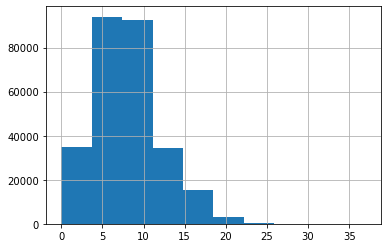

In [15]:
ax = df["길이"].hist()

In [16]:
df[df["길이"] <= 4]

,방언,표준어,연령대,출처 파일,길이
1,다 동창회지.,다 동창회지.,20대,DJDD20000247.json,2
18,학창 시절 재밌었지,학창 시절 재밌었지,20대,DJDD20000247.json,3
91,형 원래 쫌 꼰대잖아요.,형 원래 좀 꼰대잖아요.,20대,DJDD20000247.json,4
114,와 이게 진짜 축젠가?,와 이게 진짜 축젠가?,20대,DJDD20000247.json,4
148,이랬었거든요?,이랬었거든요?,20대,DJDD20000247.json,1
...,...,...,...,...,...
275130,측정 부분 주요 도로만,측정 부분 주요 도로만,30대,DJSX20003150.json,4
275131,그 대상으로 하겄지?,그 대상으로 하겠지?,30대,DJSX20003150.json,3
275132,그래도 아 기대된다.,그래도 아 기대된다.,30대,DJSX20003150.json,3
275135,나올 나올라나?,나올 나오려나?,30대,DJSX20003150.json,2


In [17]:
suf_len_df = df[df["길이"] > 4]
len(suf_len_df)

220917

In [18]:
suf_len_df[suf_len_df["방언"] != suf_len_df["표준어"]]

,방언,표준어,연령대,출처 파일,길이
11,쩍었잖아 엄청 광주처럼 광주나 뭐 뭐 처럼 많은 것도 아니고 남녀공학으로 돼있어가지...,적었잖아 엄청 광주처럼 광주나 뭐 뭐 처럼 많은 것도 아니고 남녀공학으로 돼있어가지...,20대,DJDD20000247.json,13
14,막 막 뭐냐 그 음 체육대회 할 때도 어떻게든 다 잘 보일라고 막 운동도 열심히 하고,막 막 뭐냐 그 음 체육대회 할 때도 어떻게든 다 잘 보이려고 막 운동도 열심히 하고,20대,DJDD20000247.json,16
16,그런데 지금 돌아가면은 형은 진짜로 한 다섯 이상은 만날 거야 많이 사귈 거야 엄...,그런데 지금 돌아가면은 형은 진짜로 한 다섯 이상은 만날 거야 많이 사귈 거야 엄...,20대,DJDD20000247.json,15
17,아무것도 잘 막 모르고 막 재밌게 지내긴 했는데 쑥맥이었거든,아무것도 잘 막 모르고 막 재밌게 지내긴 했는데 숙맥이었거든,20대,DJDD20000247.json,9
19,글고 막 형이 대학교 와서 좀 아쉬운 거는 동아리 생활도 한번 해볼걸,그리고 막 형이 대학교 와서 좀 아쉬운 거는 동아리 생활도 한번 해볼걸,20대,DJDD20000247.json,12
...,...,...,...,...,...
275071,엄청 많이 쏴가지고 자율 완전 그냥 자율 주행차 해버릴려구,엄청 많이 쏴가지고 자율 완전 그냥 자율 주행차 해버리려고,30대,DJSX20003150.json,9
275087,어마어마 비싸겠지 아무래도 처음에는 그런 뭔가 시스템적인 거가 어마어마하게 비싸지 ...,어마어마 비싸겠지 아무래도 처음에는 그런 뭔가 시스템적인 것이 어마어마하게 비싸지 ...,30대,DJSX20003150.json,11
275097,징하다 인자 관련 주 이런 것 밖에 눈에 안 들어온다.,징그럽다 이제 관련 주 이런 것 밖에 눈에 안 들어온다.,30대,DJSX20003150.json,10
275110,잠깐만 요 잠깐만 여보가 쫌 말해줘 잠깐만,잠깐만 요 잠깐만 여보가 조금 말해줘 잠깐만,30대,DJSX20003150.json,7


In [19]:
suf_len_df.to_csv("../datas/output/jeonla_dialect_test_age_processed.csv")

## 형태소 토큰화

In [22]:
dialect_list = suf_len_df["방언"].to_list()
dialect_list = list(map(morph_and_preprocess, dialect_list))

In [23]:
standard_list = suf_len_df["표준어"].to_list()
standard_list = list(map(morph_and_preprocess, standard_list))

In [27]:
list_to_spaced_sentence = lambda li : " ".join(li)
suf_len_df.loc[suf_len_df.index, "방언"] = list(map(list_to_spaced_sentence, dialect_list))
suf_len_df.loc[suf_len_df.index, "표준어"] = list(map(list_to_spaced_sentence, standard_list))

suf_len_df.head()

,방언,표준어,연령대,출처 파일,길이
0,나 ##는 회사 학교 ##의 이야기 ##를 하 ##고 싶 ##어 형 ##은 있 ##...,나 ##는 회사 학교 ##의 이야기 ##를 하 ##고 싶 ##어 형 ##은 있 ##...,20대,DJDD20000247.json,14
2,동창 친구 ##들 ##은 이제 초등 ##학교 때 ##부터 친구 ##인 거 ##예요 ##?,동창 친구 ##들 ##은 이제 초등 ##학교 때 ##부터 친구 ##인 거 ##예요 ##?,20대,DJDD20000247.json,7
3,음 친구 ##들 ##은 거의 이제 초등 ##학교 ##?,음 친구 ##들 ##은 거의 이제 초등 ##학교 ##?,20대,DJDD20000247.json,5
4,이렇게 친구 ##인 애 있 ##고 중학교 ##에 ##도 친구 ##들 있 ##고 한데...,이렇게 친구 ##인 애 있 ##고 중학교 ##에 ##도 친구 ##들 있 ##고 한데...,20대,DJDD20000247.json,14
5,친구 ##들 ##도 이제 촤승 아 초등 ##학교 중학교 이런 것 ##보다 ##는 고...,친구 ##들 ##도 이제 촤승 아 초등 ##학교 중학교 이런 것 ##보다 ##는 고...,20대,DJDD20000247.json,13


In [28]:
suf_len_df.to_csv("../datas/output/jeonla_dialect_test_형태소.csv")

## Word Piece 인코딩 적용

### 토크나이저 학습을 위한 파일 구성

토크나이저를 학습하기 위해서는 말뭉치가 개행으로 구분되는 파일을 구성할 필요가 있다.

In [2]:
df = pd.read_csv("../datas/output/jeonla_dialect_data_age_sampled.csv", index_col=0)
df

,방언,표준어,연령대,출처 파일,길이
0,막상 완전 돈이 급하게 필요한 것도 아니라서 그냥 용돈벌이 정도로만 할려고 생각을 ...,막상 완전 돈이 급하게 필요한 것도 아니라서 그냥 용돈벌이 정도로만 하려고 생각을 ...,20대,DJSX20002683.json,15
1,좋은 추억이 있어가지고 다시 키운다면 진돗개를 키우고 싶고,좋은 추억이 있어가지고 다시 키운다면 진돗개를 키우고 싶고,30대,DJDG20002125.json,8
2,쫌 보면 인제 세계 인제,조금 보면 인제 세계 인제,30대,DJSX20004304.json,5
3,가시나들 있으니까 뭐~ 일부러 뭐~ 쫌 져주는 척 또 한다고 그랬는진 모르겄는디,계집아이들 있으니까 뭐~ 일부러 뭐~ 조금 져주는 척 또 한다고 그랬는진 모르겠는데,20대,DJDG20001833.json,12
4,거기서 어 저 새끼 왜 미니언 안 먹는데 씨 때려야지 이러지는 않잖아,거기서 어 저 새끼 왜 미니언 안 먹는데 씨 때려야지 이러지는 않잖아,20대,DJDD20000034.json,12
...,...,...,...,...,...
508409,그~ 마음이나 생각이 조금 달라지나 봐,그~ 마음이나 생각이 조금 달라지나 봐,40대,DJSX20004708.json,6
508410,우리는 그 절에 가서 빌 수 있다는 것 내가 건강하기 때문에,우리는 그 절에 가서 빌 수 있다는 것 내가 건강하기 때문에,60대 이상,DJSX20004083.json,11
508411,방구석에 이케 이케 이불 뒤집고 이렇게 오열을 했었었는데,방구석에 이렇게 이렇게 이불 뒤집고 이렇게 오열을 했었었는데,20대,DJDG20001151.json,8
508412,뭐 없던 원래 없던 꿈도 아니라 이제 한창,뭐 없던 원래 없던 꿈도 아니라 이제 한창,20대,DJSX20000555.json,8


In [3]:
df = df.dropna(how='any')
with open('../datas/output/jeonla_dialect_text_sampled.txt', 'w', encoding='utf8') as f:
    f.write('\n'.join(df['방언'] + " " + df["표준어"]))

In [4]:
from tokenizers import BertWordPieceTokenizer

wordpiece_tokenizer = BertWordPieceTokenizer(lowercase=False)
wordpiece_tokenizer.train(
    files="../datas/output/jeonla_dialect_text_sampled.txt",
    vocab_size=30000,
    limit_alphabet=6000,
    min_frequency=3
)

In [17]:
wordpiece_tokenizer.save_model('./')

['./vocab.txt']

In [12]:
code_result_dialect = wordpiece_tokenizer.encode_batch(df["방언"])
code_result_standard = wordpiece_tokenizer.encode_batch(df["표준어"])

In [13]:
df["방언"] = [' '.join(res.tokens) for res in code_result_dialect]
df["방언"]

C:\Users\wnsgh\AppData\Local\Temp\ipykernel_14636\1972960620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["방언"] = [' '.join(res.tokens) for res in code_result_dialect]


0         막상 완전 돈이 급하게 필요한 것도 아니라서 그냥 용돈 ##벌이 정도로만 할려고 생...
1                    좋은 추억이 있어가지고 다시 키운다 ##면 진돗개 ##를 키우고 싶고
2                                             쫌 보면 인제 세계 인제
3         가시나 ##들 있으니까 뭐 ~ 일부러 뭐 ~ 쫌 져 ##주는 척 또 한다고 그랬 #...
4              거기서 어 저 새끼 왜 미니 ##언 안 먹는데 씨 때려 ##야지 이러지는 않잖아
                                ...                        
508409                         그 ~ 마음이 ##나 생각이 조금 달라지 ##나 봐
508410                 우리는 그 절에 가서 빌 수 있다는 것 내가 건강 ##하기 때문에
508411          방 ##구석 ##에 이케 이케 이불 뒤집 ##고 이렇게 오 ##열을 했었었는데
508412                              뭐 없던 원래 없던 꿈도 아니라 이제 한창
508413                  너 말대로 알고리즘 타고 오니까 쫌 괴 ##아는 ##게 많아 .
Name: 방언, Length: 508176, dtype: object

In [14]:
df["표준어"] = [' '.join(res.tokens) for res in code_result_standard]
df["표준어"]

C:\Users\wnsgh\AppData\Local\Temp\ipykernel_14636\2865016148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["표준어"] = [' '.join(res.tokens) for res in code_result_standard]


0         막상 완전 돈이 급하게 필요한 것도 아니라서 그냥 용돈 ##벌이 정도로만 하려고 생...
1                    좋은 추억이 있어가지고 다시 키운다 ##면 진돗개 ##를 키우고 싶고
2                                            조금 보면 인제 세계 인제
3         계집아이 ##들 있으니까 뭐 ~ 일부러 뭐 ~ 조금 져 ##주는 척 또 한다고 그랬...
4              거기서 어 저 새끼 왜 미니 ##언 안 먹는데 씨 때려 ##야지 이러지는 않잖아
                                ...                        
508409                         그 ~ 마음이 ##나 생각이 조금 달라지 ##나 봐
508410                 우리는 그 절에 가서 빌 수 있다는 것 내가 건강 ##하기 때문에
508411        방 ##구석 ##에 이렇게 이렇게 이불 뒤집 ##고 이렇게 오 ##열을 했었었는데
508412                              뭐 없던 원래 없던 꿈도 아니라 이제 한창
508413                    너 말대로 알고리즘 타고 오니까 조금 괜찮은 ##게 많아 .
Name: 표준어, Length: 508176, dtype: object

In [15]:
df.to_csv("../datas/output/jeonla_dialect_data_WordPiece.csv")

### 테스트셋 토큰화

In [16]:
df = pd.read_csv("../datas/output/jeonla_dialect_test_age_processed.csv", index_col=0)
df

,방언,표준어,연령대,출처 파일,길이
0,나는 회사 학교의 이야기를 하고 싶어 형은 있잖아요 친구들 같은 거 다 동창 친구들...,나는 회사 학교의 이야기를 하고 싶어 형은 있잖아요 친구들 같은 거 다 동창 친구들...,20대,DJDD20000247.json,14
2,동창 친구들은 이제 초등학교 때부터 친구인 거예요?,동창 친구들은 이제 초등학교 때부터 친구인 거예요?,20대,DJDD20000247.json,7
3,음 친구들은 거의 이제 초등학교?,음 친구들은 거의 이제 초등학교?,20대,DJDD20000247.json,5
4,이렇게 친구인 애 있고 중학교에도 친구들 있고 한데 근데 형은 솔직히 말하면 그거 있잖아,이렇게 친구인 애 있고 중학교에도 친구들 있고 한데 근데 형은 솔직히 말하면 그거 있잖아,20대,DJDD20000247.json,14
5,친구들도 이제 촤승 아 초등학교 중학교 이런 것보다는 고등학교에서 진짜 친구 나뉜다...,친구들도 이제 촤승 아 초등학교 중학교 이런 것보다는 고등학교에서 진짜 친구 나뉜다...,20대,DJDD20000247.json,13
...,...,...,...,...,...
275123,어 택시가 있을 거 같애.,어 택시가 있을 거 같애.,30대,DJSX20003150.json,5
275125,우리나라도 완전 자율주행차를 이 천 이 십 칠 년에 최초로 상용화한다고 발표했대.,우리나라도 완전 자율주행차를 이 천 이 십 칠 년에 최초로 상용화한다고 발표했대.,30대,DJSX20003150.json,12
275126,대박이다 이제 칠 년 남았네 칠 년,대박이다 이제 칠 년 남았네 칠 년,30대,DJSX20003150.json,7
275133,이 천 이 십 칠 년이 이 천 이 십 칠 년에,이 천 이 십 칠 년이 이 천 이 십 칠 년에,30대,DJSX20003150.json,12


In [18]:
df = df.dropna(how='any')
with open('../datas/output/jeonla_dialect_test_text.txt', 'w', encoding='utf8') as f:
    f.write('\n'.join(df["방언"] + " " + df["표준어"]))

In [19]:
from tokenizers import BertWordPieceTokenizer

bpe_tokenizer = BertWordPieceTokenizer(lowercase=False)
bpe_tokenizer.train(
    files="../datas/output/jeonla_dialect_test_text.txt",
    vocab_size=30000,
    limit_alphabet=6000,
    min_frequency=3
)

In [21]:
bpe_tokenizer.save_model('./')

['./vocab.txt']

In [22]:
code_result_dialect = bpe_tokenizer.encode_batch(df["방언"])
code_result_standard = bpe_tokenizer.encode_batch(df["표준어"])

In [23]:
df["방언"] = [' '.join(res.tokens) for res in code_result_dialect]
df["방언"]

C:\Users\wnsgh\AppData\Local\Temp\ipykernel_14636\1972960620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["방언"] = [' '.join(res.tokens) for res in code_result_dialect]


0         나는 회사 학교의 이야기를 하고 싶어 형은 있잖아요 친구들 같은 거 다 동창 친구들...
2                             동창 친구들은 이제 초등학교 때부터 친구인 거예요 ?
3                                       음 친구들은 거의 이제 초등학교 ?
4         이렇게 친구인 애 있고 중학교 ##에도 친구들 있고 한데 근데 형은 솔직히 말하면 ...
5         친구들도 이제 촤 ##승 아 초등학교 중학교 이런 것보다는 고등학교에 ##서 진짜 ...
                                ...                        
275123                                   어 택시 ##가 있을 거 같애 .
275125    우리나라도 완전 자율주행차 ##를 이 천 이 십 칠 년에 최초로 상용 ##화한 ##...
275126                               대박이다 이제 칠 년 남았 ##네 칠 년
275133                            이 천 이 십 칠 년이 이 천 이 십 칠 년에
275134                                   근데 발표를 한다고 해서 이게 딱
Name: 방언, Length: 220872, dtype: object

In [24]:
df["표준어"] = [' '.join(res.tokens) for res in code_result_standard]
df["표준어"]

C:\Users\wnsgh\AppData\Local\Temp\ipykernel_14636\2865016148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["표준어"] = [' '.join(res.tokens) for res in code_result_standard]


0         나는 회사 학교의 이야기를 하고 싶어 형은 있잖아요 친구들 같은 거 다 동창 친구들...
2                             동창 친구들은 이제 초등학교 때부터 친구인 거예요 ?
3                                       음 친구들은 거의 이제 초등학교 ?
4         이렇게 친구인 애 있고 중학교 ##에도 친구들 있고 한데 근데 형은 솔직히 말하면 ...
5         친구들도 이제 촤 ##승 아 초등학교 중학교 이런 것보다는 고등학교에 ##서 진짜 ...
                                ...                        
275123                                   어 택시 ##가 있을 거 같애 .
275125    우리나라도 완전 자율주행차 ##를 이 천 이 십 칠 년에 최초로 상용 ##화한 ##...
275126                               대박이다 이제 칠 년 남았 ##네 칠 년
275133                            이 천 이 십 칠 년이 이 천 이 십 칠 년에
275134                                   근데 발표를 한다고 해서 이게 딱
Name: 표준어, Length: 220872, dtype: object

In [25]:
df.to_csv("../datas/output/jeonla_dialect_test_WordPiece.csv")

## 자모 토큰화

In [59]:
df = pd.read_csv("../datas/output/jeonla_dialect_data_age_sampled.csv", index_col=0)
df

,방언,표준어,연령대,출처 파일,길이
0,막상 완전 돈이 급하게 필요한 것도 아니라서 그냥 용돈벌이 정도로만 할려고 생각을 ...,막상 완전 돈이 급하게 필요한 것도 아니라서 그냥 용돈벌이 정도로만 하려고 생각을 ...,20대,DJSX20002683.json,15
1,좋은 추억이 있어가지고 다시 키운다면 진돗개를 키우고 싶고,좋은 추억이 있어가지고 다시 키운다면 진돗개를 키우고 싶고,30대,DJDG20002125.json,8
2,쫌 보면 인제 세계 인제,조금 보면 인제 세계 인제,30대,DJSX20004304.json,5
3,가시나들 있으니까 뭐~ 일부러 뭐~ 쫌 져주는 척 또 한다고 그랬는진 모르겄는디,계집아이들 있으니까 뭐~ 일부러 뭐~ 조금 져주는 척 또 한다고 그랬는진 모르겠는데,20대,DJDG20001833.json,12
4,거기서 어 저 새끼 왜 미니언 안 먹는데 씨 때려야지 이러지는 않잖아,거기서 어 저 새끼 왜 미니언 안 먹는데 씨 때려야지 이러지는 않잖아,20대,DJDD20000034.json,12
...,...,...,...,...,...
508409,그~ 마음이나 생각이 조금 달라지나 봐,그~ 마음이나 생각이 조금 달라지나 봐,40대,DJSX20004708.json,6
508410,우리는 그 절에 가서 빌 수 있다는 것 내가 건강하기 때문에,우리는 그 절에 가서 빌 수 있다는 것 내가 건강하기 때문에,60대 이상,DJSX20004083.json,11
508411,방구석에 이케 이케 이불 뒤집고 이렇게 오열을 했었었는데,방구석에 이렇게 이렇게 이불 뒤집고 이렇게 오열을 했었었는데,20대,DJDG20001151.json,8
508412,뭐 없던 원래 없던 꿈도 아니라 이제 한창,뭐 없던 원래 없던 꿈도 아니라 이제 한창,20대,DJSX20000555.json,8


In [62]:
from jamo import h2j, j2hcj # 자모화
from jamo import hcj2j, j2h

text = df.iloc[0, 0][0]
jamo_str = j2hcj(h2j(text))
print(jamo_str)

ㅁㅏㄱ


In [65]:
jamo_list = [hcj2j(c) for c in jamo_str]
#print(j2h(jamo_str[0], jamo_str[1], jamo_str[2]))
print(j2h(*jamo_str[:-1]))

마


In [ ]:
text = df.iloc[0, 0][0]
jamo_str = j2hcj(h2j(text))
print(jamo_str)

In [47]:
from jamo import h2j, j2hcj # 자모화

def jamo_tokenization(sentence):
    token_list = []

    for c in sentence:
        if c == ' ':
            token_list.append("<SPC>")
        else:
            jamo_str = j2hcj(h2j(c))
            token_list.extend(jamo_str)
            token_list.append("<SEP>")
    
    return token_list

In [48]:
text = df.iloc[0, 0]
print(jamo_tokenization(text))

['ㅁ', 'ㅏ', 'ㄱ', '<SEP>', 'ㅅ', 'ㅏ', 'ㅇ', '<SEP>', '<SPC>', 'ㅇ', 'ㅘ', 'ㄴ', '<SEP>', 'ㅈ', 'ㅓ', 'ㄴ', '<SEP>', '<SPC>', 'ㄷ', 'ㅗ', 'ㄴ', '<SEP>', 'ㅇ', 'ㅣ', '<SEP>', '<SPC>', 'ㄱ', 'ㅡ', 'ㅂ', '<SEP>', 'ㅎ', 'ㅏ', '<SEP>', 'ㄱ', 'ㅔ', '<SEP>', '<SPC>', 'ㅍ', 'ㅣ', 'ㄹ', '<SEP>', 'ㅇ', 'ㅛ', '<SEP>', 'ㅎ', 'ㅏ', 'ㄴ', '<SEP>', '<SPC>', 'ㄱ', 'ㅓ', 'ㅅ', '<SEP>', 'ㄷ', 'ㅗ', '<SEP>', '<SPC>', 'ㅇ', 'ㅏ', '<SEP>', 'ㄴ', 'ㅣ', '<SEP>', 'ㄹ', 'ㅏ', '<SEP>', 'ㅅ', 'ㅓ', '<SEP>', '<SPC>', 'ㄱ', 'ㅡ', '<SEP>', 'ㄴ', 'ㅑ', 'ㅇ', '<SEP>', '<SPC>', 'ㅇ', 'ㅛ', 'ㅇ', '<SEP>', 'ㄷ', 'ㅗ', 'ㄴ', '<SEP>', 'ㅂ', 'ㅓ', 'ㄹ', '<SEP>', 'ㅇ', 'ㅣ', '<SEP>', '<SPC>', 'ㅈ', 'ㅓ', 'ㅇ', '<SEP>', 'ㄷ', 'ㅗ', '<SEP>', 'ㄹ', 'ㅗ', '<SEP>', 'ㅁ', 'ㅏ', 'ㄴ', '<SEP>', '<SPC>', 'ㅎ', 'ㅏ', 'ㄹ', '<SEP>', 'ㄹ', 'ㅕ', '<SEP>', 'ㄱ', 'ㅗ', '<SEP>', '<SPC>', 'ㅅ', 'ㅐ', 'ㅇ', '<SEP>', 'ㄱ', 'ㅏ', 'ㄱ', '<SEP>', 'ㅇ', 'ㅡ', 'ㄹ', '<SEP>', '<SPC>', 'ㅎ', 'ㅏ', '<SEP>', 'ㄱ', 'ㅗ', '<SEP>', '<SPC>', 'ㅇ', 'ㅣ', 'ㅆ', '<SEP>', 'ㄱ', 'ㅓ', '<SEP>', 'ㄷ', 'ㅡ', 'ㄴ', '<SEP>', '<SPC>', 'ㄱ', 'ㅡ', '<SEP>', 'ㄹ', 'ㅐ'

In [49]:
dialect_list = df["방언"].to_list()
dialect_list = list(map(jamo_tokenization, dialect_list))

In [50]:
standard_list = df["표준어"].to_list()
standard_list = list(map(jamo_tokenization, standard_list))

In [51]:
list_to_spaced_sentence = lambda li : " ".join(li)
df.loc[df.index, "방언"] = list(map(list_to_spaced_sentence, dialect_list))
df.loc[df.index, "표준어"] = list(map(list_to_spaced_sentence, standard_list))

df

,방언,표준어,연령대,출처 파일,길이
0,ㅁ ㅏ ㄱ <SEP> ㅅ ㅏ ㅇ <SEP> <SPC> ㅇ ㅘ ㄴ <SEP> ㅈ ㅓ ...,ㅁ ㅏ ㄱ <SEP> ㅅ ㅏ ㅇ <SEP> <SPC> ㅇ ㅘ ㄴ <SEP> ㅈ ㅓ ...,20대,DJSX20002683.json,15
1,ㅈ ㅗ ㅎ <SEP> ㅇ ㅡ ㄴ <SEP> <SPC> ㅊ ㅜ <SEP> ㅇ ㅓ ㄱ ...,ㅈ ㅗ ㅎ <SEP> ㅇ ㅡ ㄴ <SEP> <SPC> ㅊ ㅜ <SEP> ㅇ ㅓ ㄱ ...,30대,DJDG20002125.json,8
2,ㅉ ㅗ ㅁ <SEP> <SPC> ㅂ ㅗ <SEP> ㅁ ㅕ ㄴ <SEP> <SPC> ...,ㅈ ㅗ <SEP> ㄱ ㅡ ㅁ <SEP> <SPC> ㅂ ㅗ <SEP> ㅁ ㅕ ㄴ <S...,30대,DJSX20004304.json,5
3,ㄱ ㅏ <SEP> ㅅ ㅣ <SEP> ㄴ ㅏ <SEP> ㄷ ㅡ ㄹ <SEP> <SPC...,ㄱ ㅖ <SEP> ㅈ ㅣ ㅂ <SEP> ㅇ ㅏ <SEP> ㅇ ㅣ <SEP> ㄷ ㅡ ...,20대,DJDG20001833.json,12
4,ㄱ ㅓ <SEP> ㄱ ㅣ <SEP> ㅅ ㅓ <SEP> <SPC> ㅇ ㅓ <SEP> ...,ㄱ ㅓ <SEP> ㄱ ㅣ <SEP> ㅅ ㅓ <SEP> <SPC> ㅇ ㅓ <SEP> ...,20대,DJDD20000034.json,12
...,...,...,...,...,...
508409,ㄱ ㅡ <SEP> ~ <SEP> <SPC> ㅁ ㅏ <SEP> ㅇ ㅡ ㅁ <SEP> ...,ㄱ ㅡ <SEP> ~ <SEP> <SPC> ㅁ ㅏ <SEP> ㅇ ㅡ ㅁ <SEP> ...,40대,DJSX20004708.json,6
508410,ㅇ ㅜ <SEP> ㄹ ㅣ <SEP> ㄴ ㅡ ㄴ <SEP> <SPC> ㄱ ㅡ <SEP...,ㅇ ㅜ <SEP> ㄹ ㅣ <SEP> ㄴ ㅡ ㄴ <SEP> <SPC> ㄱ ㅡ <SEP...,60대 이상,DJSX20004083.json,11
508411,ㅂ ㅏ ㅇ <SEP> ㄱ ㅜ <SEP> ㅅ ㅓ ㄱ <SEP> ㅇ ㅔ <SEP> <S...,ㅂ ㅏ ㅇ <SEP> ㄱ ㅜ <SEP> ㅅ ㅓ ㄱ <SEP> ㅇ ㅔ <SEP> <S...,20대,DJDG20001151.json,8
508412,ㅁ ㅝ <SEP> <SPC> ㅇ ㅓ ㅄ <SEP> ㄷ ㅓ ㄴ <SEP> <SPC> ...,ㅁ ㅝ <SEP> <SPC> ㅇ ㅓ ㅄ <SEP> ㄷ ㅓ ㄴ <SEP> <SPC> ...,20대,DJSX20000555.json,8


In [52]:
df.to_csv("../datas/output/jeonla_dialect_data_jamo.csv")

### 테스트셋 처리

In [53]:
df = pd.read_csv("../datas/output/jeonla_dialect_test_age_processed.csv", index_col=0)
df

,방언,표준어,연령대,출처 파일,길이
0,나는 회사 학교의 이야기를 하고 싶어 형은 있잖아요 친구들 같은 거 다 동창 친구들...,나는 회사 학교의 이야기를 하고 싶어 형은 있잖아요 친구들 같은 거 다 동창 친구들...,20대,DJDD20000247.json,14
2,동창 친구들은 이제 초등학교 때부터 친구인 거예요?,동창 친구들은 이제 초등학교 때부터 친구인 거예요?,20대,DJDD20000247.json,7
3,음 친구들은 거의 이제 초등학교?,음 친구들은 거의 이제 초등학교?,20대,DJDD20000247.json,5
4,이렇게 친구인 애 있고 중학교에도 친구들 있고 한데 근데 형은 솔직히 말하면 그거 있잖아,이렇게 친구인 애 있고 중학교에도 친구들 있고 한데 근데 형은 솔직히 말하면 그거 있잖아,20대,DJDD20000247.json,14
5,친구들도 이제 촤승 아 초등학교 중학교 이런 것보다는 고등학교에서 진짜 친구 나뉜다...,친구들도 이제 촤승 아 초등학교 중학교 이런 것보다는 고등학교에서 진짜 친구 나뉜다...,20대,DJDD20000247.json,13
...,...,...,...,...,...
275123,어 택시가 있을 거 같애.,어 택시가 있을 거 같애.,30대,DJSX20003150.json,5
275125,우리나라도 완전 자율주행차를 이 천 이 십 칠 년에 최초로 상용화한다고 발표했대.,우리나라도 완전 자율주행차를 이 천 이 십 칠 년에 최초로 상용화한다고 발표했대.,30대,DJSX20003150.json,12
275126,대박이다 이제 칠 년 남았네 칠 년,대박이다 이제 칠 년 남았네 칠 년,30대,DJSX20003150.json,7
275133,이 천 이 십 칠 년이 이 천 이 십 칠 년에,이 천 이 십 칠 년이 이 천 이 십 칠 년에,30대,DJSX20003150.json,12


In [54]:
dialect_list = df["방언"].to_list()
dialect_list = list(map(jamo_tokenization, dialect_list))

In [55]:
standard_list = df["표준어"].to_list()
standard_list = list(map(jamo_tokenization, standard_list))

In [56]:
list_to_spaced_sentence = lambda li : " ".join(li)
df.loc[df.index, "방언"] = list(map(list_to_spaced_sentence, dialect_list))
df.loc[df.index, "표준어"] = list(map(list_to_spaced_sentence, standard_list))

df

,방언,표준어,연령대,출처 파일,길이
0,ㄴ ㅏ <SEP> ㄴ ㅡ ㄴ <SEP> <SPC> ㅎ ㅚ <SEP> ㅅ ㅏ <SEP...,ㄴ ㅏ <SEP> ㄴ ㅡ ㄴ <SEP> <SPC> ㅎ ㅚ <SEP> ㅅ ㅏ <SEP...,20대,DJDD20000247.json,14
2,ㄷ ㅗ ㅇ <SEP> ㅊ ㅏ ㅇ <SEP> <SPC> ㅊ ㅣ ㄴ <SEP> ㄱ ㅜ ...,ㄷ ㅗ ㅇ <SEP> ㅊ ㅏ ㅇ <SEP> <SPC> ㅊ ㅣ ㄴ <SEP> ㄱ ㅜ ...,20대,DJDD20000247.json,7
3,ㅇ ㅡ ㅁ <SEP> <SPC> <SPC> ㅊ ㅣ ㄴ <SEP> ㄱ ㅜ <SEP> ...,ㅇ ㅡ ㅁ <SEP> <SPC> <SPC> ㅊ ㅣ ㄴ <SEP> ㄱ ㅜ <SEP> ...,20대,DJDD20000247.json,5
4,ㅇ ㅣ <SEP> ㄹ ㅓ ㅎ <SEP> ㄱ ㅔ <SEP> <SPC> ㅊ ㅣ ㄴ <S...,ㅇ ㅣ <SEP> ㄹ ㅓ ㅎ <SEP> ㄱ ㅔ <SEP> <SPC> ㅊ ㅣ ㄴ <S...,20대,DJDD20000247.json,14
5,ㅊ ㅣ ㄴ <SEP> ㄱ ㅜ <SEP> ㄷ ㅡ ㄹ <SEP> ㄷ ㅗ <SEP> <S...,ㅊ ㅣ ㄴ <SEP> ㄱ ㅜ <SEP> ㄷ ㅡ ㄹ <SEP> ㄷ ㅗ <SEP> <S...,20대,DJDD20000247.json,13
...,...,...,...,...,...
275123,ㅇ ㅓ <SEP> <SPC> ㅌ ㅐ ㄱ <SEP> ㅅ ㅣ <SEP> ㄱ ㅏ <SEP...,ㅇ ㅓ <SEP> <SPC> ㅌ ㅐ ㄱ <SEP> ㅅ ㅣ <SEP> ㄱ ㅏ <SEP...,30대,DJSX20003150.json,5
275125,ㅇ ㅜ <SEP> ㄹ ㅣ <SEP> ㄴ ㅏ <SEP> ㄹ ㅏ <SEP> ㄷ ㅗ <S...,ㅇ ㅜ <SEP> ㄹ ㅣ <SEP> ㄴ ㅏ <SEP> ㄹ ㅏ <SEP> ㄷ ㅗ <S...,30대,DJSX20003150.json,12
275126,ㄷ ㅐ <SEP> ㅂ ㅏ ㄱ <SEP> ㅇ ㅣ <SEP> ㄷ ㅏ <SEP> <SPC...,ㄷ ㅐ <SEP> ㅂ ㅏ ㄱ <SEP> ㅇ ㅣ <SEP> ㄷ ㅏ <SEP> <SPC...,30대,DJSX20003150.json,7
275133,ㅇ ㅣ <SEP> <SPC> ㅊ ㅓ ㄴ <SEP> <SPC> ㅇ ㅣ <SEP> <S...,ㅇ ㅣ <SEP> <SPC> ㅊ ㅓ ㄴ <SEP> <SPC> ㅇ ㅣ <SEP> <S...,30대,DJSX20003150.json,12


In [57]:
df.to_csv("../datas/output/jeonla_dialect_test_jamo.csv")

## Byte 수준 BPE 토큰화

In [3]:
from tokenizers import ByteLevelBPETokenizer

bpe_tokenizer = ByteLevelBPETokenizer()
bpe_tokenizer.train(
    files="../datas/output/jeonla_dialect_test_text.txt",
)

In [2]:
df = pd.read_csv("../datas/output/jeonla_dialect_data_age_sampled.csv", index_col=0)
df

,방언,표준어,연령대,출처 파일,길이
0,막상 완전 돈이 급하게 필요한 것도 아니라서 그냥 용돈벌이 정도로만 할려고 생각을 ...,막상 완전 돈이 급하게 필요한 것도 아니라서 그냥 용돈벌이 정도로만 하려고 생각을 ...,20대,DJSX20002683.json,15
1,좋은 추억이 있어가지고 다시 키운다면 진돗개를 키우고 싶고,좋은 추억이 있어가지고 다시 키운다면 진돗개를 키우고 싶고,30대,DJDG20002125.json,8
2,쫌 보면 인제 세계 인제,조금 보면 인제 세계 인제,30대,DJSX20004304.json,5
3,가시나들 있으니까 뭐~ 일부러 뭐~ 쫌 져주는 척 또 한다고 그랬는진 모르겄는디,계집아이들 있으니까 뭐~ 일부러 뭐~ 조금 져주는 척 또 한다고 그랬는진 모르겠는데,20대,DJDG20001833.json,12
4,거기서 어 저 새끼 왜 미니언 안 먹는데 씨 때려야지 이러지는 않잖아,거기서 어 저 새끼 왜 미니언 안 먹는데 씨 때려야지 이러지는 않잖아,20대,DJDD20000034.json,12
...,...,...,...,...,...
508409,그~ 마음이나 생각이 조금 달라지나 봐,그~ 마음이나 생각이 조금 달라지나 봐,40대,DJSX20004708.json,6
508410,우리는 그 절에 가서 빌 수 있다는 것 내가 건강하기 때문에,우리는 그 절에 가서 빌 수 있다는 것 내가 건강하기 때문에,60대 이상,DJSX20004083.json,11
508411,방구석에 이케 이케 이불 뒤집고 이렇게 오열을 했었었는데,방구석에 이렇게 이렇게 이불 뒤집고 이렇게 오열을 했었었는데,20대,DJDG20001151.json,8
508412,뭐 없던 원래 없던 꿈도 아니라 이제 한창,뭐 없던 원래 없던 꿈도 아니라 이제 한창,20대,DJSX20000555.json,8


### 토큰화, 역토큰화 실험

In [7]:
encode_result = bpe_tokenizer.encode(df.loc[0, "방언"])
encode_result.tokens

['ë§īìĥģ',
 'ĠìĻĦìłĦ',
 'ĠëıĪìĿ´',
 'Ġê¸īíķĺê²Į',
 'ĠíķĦìļĶíķľ',
 'Ġê²ĥëıĦ',
 'ĠìķĦëĭĪëĿ¼ìĦľ',
 'Ġê·¸ëĥ¥',
 'Ġìļ©ëıĪ',
 'ë²ĮìĿ´',
 'ĠìłķëıĦë¡ľë§Į',
 'Ġíķłëł¤ê³ł',
 'ĠìĥĿê°ģìĿĦ',
 'Ġíķĺê³ł',
 'ĠìŀĪê±°ëĵł',
 'Ġê·¸ëŀĺìĦľ']

In [7]:
encode_result

Encoding(num_tokens=16, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])

In [8]:
token_ids = [bpe_tokenizer.token_to_id(token) for token in encode_result.tokens]

In [9]:
bpe_tokenizer.decode(token_ids)

'막상 완전 돈이 급하게 필요한 것도 아니라서 그냥 용돈벌이 정도로만 할려고 생각을 하고 있거든 그래서'

In [13]:
bpe_tokenizer.save_model("./")

['./vocab.json', './merges.txt']

In [6]:
bpe_tokenizer.from_file("./bpe_vocab.json", "./bpe_merges.txt")

Tokenizer(vocabulary_size=30000, model=ByteLevelBPE, add_prefix_space=False, lowercase=False, dropout=None, unicode_normalizer=None, continuing_subword_prefix=None, end_of_word_suffix=None, trim_offsets=False)

In [16]:
bpe_tokenizer.decode(token_ids)

'막상 완전 돈이 급하게 필요한 것도 아니라서 그냥 용돈벌이 정도로만 할려고 생각을 하고 있거든 그래서'

### 토큰화

In [17]:
code_result_dialect = bpe_tokenizer.encode_batch(df["방언"])
code_result_standard = bpe_tokenizer.encode_batch(df["표준어"])

In [18]:
df.loc[df.index, "방언"] = [' '.join(res.tokens) for res in code_result_dialect]
df["방언"]

0         ë§īìĥģ ĠìĻĦìłĦ ĠëıĪìĿ´ Ġê¸īíķĺê²Į ĠíķĦìļĶíķľ Ġ...
1         ì¢ĭìĿĢ Ġì¶ĶìĸµìĿ´ ĠìŀĪìĸ´ê°Ģì§Ģê³ł Ġëĭ¤ìĭľ ĠíĤ...
2                       ì«Į Ġë³´ë©´ ĠìĿ¸ìłľ ĠìĦ¸ê³Ħ ĠìĿ¸ìłľ
3         ê°Ģìĭľ ëĤĺëĵ¤ ĠìŀĪìľ¼ëĭĪê¹Į ĠëŃĲ ~ ĠìĿ¼ë¶ĢëŁ¬ ...
4         ê±°ê¸°ìĦľ Ġìĸ´ ĠìłĢ ĠìĥĪëģ¼ ĠìĻľ Ġë¯¸ëĭĪ ìĸ¸ Ġ...
                                ...                        
508409    ê·¸ ~ Ġë§ĪìĿĮ ìĿ´ëĤĺ ĠìĥĿê°ģìĿ´ Ġì¡°ê¸Ī Ġëĭ¬ëĿ...
508410    ìļ°ë¦¬ëĬĶ Ġê·¸ ĠìłĪìĹĲ Ġê°ĢìĦľ Ġë¹Į ĠìĪĺ ĠìŀĪë...
508411    ë°© êµ¬ ìĦĿìĹĲ ĠìĿ´ì¼Ģ ĠìĿ´ì¼Ģ ĠìĿ´ë¶Ī ĠëĴ¤ì§ĳ...
508412    ëŃĲ ĠìĹĨëįĺ ĠìĽĲëŀĺ ĠìĹĨëįĺ Ġê¿ĪëıĦ ĠìķĦëĭĪëĿ¼...
508413    ëĦĪ Ġë§ĲëĮĢë¡ľ ĠìķĮê³łë¦¬ì¦ĺ ĠíĥĢê³ł Ġìĺ¤ëĭĪê¹...
Name: 방언, Length: 508414, dtype: object

In [19]:
df.loc[df.index, "표준어"] = [' '.join(res.tokens) for res in code_result_standard]
df["표준어"]

0         ë§īìĥģ ĠìĻĦìłĦ ĠëıĪìĿ´ Ġê¸īíķĺê²Į ĠíķĦìļĶíķľ Ġ...
1         ì¢ĭìĿĢ Ġì¶ĶìĸµìĿ´ ĠìŀĪìĸ´ê°Ģì§Ģê³ł Ġëĭ¤ìĭľ ĠíĤ...
2                    ì¡°ê¸Ī Ġë³´ë©´ ĠìĿ¸ìłľ ĠìĦ¸ê³Ħ ĠìĿ¸ìłľ
3         ê³Ħ ì§ĳ ìķĦìĿ´ëĵ¤ ĠìŀĪìľ¼ëĭĪê¹Į ĠëŃĲ ~ ĠìĿ¼ë¶Ģ...
4         ê±°ê¸°ìĦľ Ġìĸ´ ĠìłĢ ĠìĥĪëģ¼ ĠìĻľ Ġë¯¸ëĭĪ ìĸ¸ Ġ...
                                ...                        
508409    ê·¸ ~ Ġë§ĪìĿĮ ìĿ´ëĤĺ ĠìĥĿê°ģìĿ´ Ġì¡°ê¸Ī Ġëĭ¬ëĿ...
508410    ìļ°ë¦¬ëĬĶ Ġê·¸ ĠìłĪìĹĲ Ġê°ĢìĦľ Ġë¹Į ĠìĪĺ ĠìŀĪë...
508411    ë°© êµ¬ ìĦĿìĹĲ ĠìĿ´ëłĩê²Į ĠìĿ´ëłĩê²Į ĠìĿ´ë¶Ī Ġ...
508412    ëŃĲ ĠìĹĨëįĺ ĠìĽĲëŀĺ ĠìĹĨëįĺ Ġê¿ĪëıĦ ĠìķĦëĭĪëĿ¼...
508413    ëĦĪ Ġë§ĲëĮĢë¡ľ ĠìķĮê³łë¦¬ì¦ĺ ĠíĥĢê³ł Ġìĺ¤ëĭĪê¹...
Name: 표준어, Length: 508414, dtype: object

In [20]:
df.to_csv("../datas/output/jeonla_dialect_data_bpe.csv")

### 테스트셋 토큰화

In [21]:
df = pd.read_csv("../datas/output/jeonla_dialect_test_age_processed.csv", index_col=0)
df

,방언,표준어,연령대,출처 파일,길이
0,나는 회사 학교의 이야기를 하고 싶어 형은 있잖아요 친구들 같은 거 다 동창 친구들...,나는 회사 학교의 이야기를 하고 싶어 형은 있잖아요 친구들 같은 거 다 동창 친구들...,20대,DJDD20000247.json,14
2,동창 친구들은 이제 초등학교 때부터 친구인 거예요?,동창 친구들은 이제 초등학교 때부터 친구인 거예요?,20대,DJDD20000247.json,7
3,음 친구들은 거의 이제 초등학교?,음 친구들은 거의 이제 초등학교?,20대,DJDD20000247.json,5
4,이렇게 친구인 애 있고 중학교에도 친구들 있고 한데 근데 형은 솔직히 말하면 그거 있잖아,이렇게 친구인 애 있고 중학교에도 친구들 있고 한데 근데 형은 솔직히 말하면 그거 있잖아,20대,DJDD20000247.json,14
5,친구들도 이제 촤승 아 초등학교 중학교 이런 것보다는 고등학교에서 진짜 친구 나뉜다...,친구들도 이제 촤승 아 초등학교 중학교 이런 것보다는 고등학교에서 진짜 친구 나뉜다...,20대,DJDD20000247.json,13
...,...,...,...,...,...
275123,어 택시가 있을 거 같애.,어 택시가 있을 거 같애.,30대,DJSX20003150.json,5
275125,우리나라도 완전 자율주행차를 이 천 이 십 칠 년에 최초로 상용화한다고 발표했대.,우리나라도 완전 자율주행차를 이 천 이 십 칠 년에 최초로 상용화한다고 발표했대.,30대,DJSX20003150.json,12
275126,대박이다 이제 칠 년 남았네 칠 년,대박이다 이제 칠 년 남았네 칠 년,30대,DJSX20003150.json,7
275133,이 천 이 십 칠 년이 이 천 이 십 칠 년에,이 천 이 십 칠 년이 이 천 이 십 칠 년에,30대,DJSX20003150.json,12


In [22]:
code_result_dialect = bpe_tokenizer.encode_batch(df["방언"])
code_result_standard = bpe_tokenizer.encode_batch(df["표준어"])

In [23]:
df.loc[df.index, "방언"] = [' '.join(res.tokens) for res in code_result_dialect]
df["방언"]

0         ëĤĺëĬĶ ĠíļĮìĤ¬ ĠíķĻêµĲìĿĺ ĠìĿ´ìķ¼ê¸°ë¥¼ Ġíķĺê³...
2         ëıĻ ì°½ Ġì¹ľêµ¬ëĵ¤ìĿĢ ĠìĿ´ìłľ Ġì´Īëĵ±íķĻêµĲ Ġë...
3         ìĿĮ Ġ Ġì¹ľêµ¬ëĵ¤ìĿĢ Ġê±°ìĿĺ ĠìĿ´ìłľ Ġì´Īëĵ±íķĻ...
4         ìĿ´ëłĩê²Į Ġì¹ľêµ¬ìĿ¸ Ġìķł ĠìŀĪê³ł Ġì¤ĳíķĻêµĲ ì...
5         ì¹ľêµ¬ ëĵ¤ëıĦ ĠìĿ´ìłľ Ġì ´¤ ìĬ¹ ĠìķĦ Ġì´Īëĵ±íķ...
                                ...                        
275123               ìĸ´ ĠíĥĿìĭľ ê°Ģ ĠìŀĪìĿĦ Ġê±° Ġê°Ļìķł .
275125    ìļ°ë¦¬ ëĤĺ ëĿ¼ëıĦ ĠìĻĦìłĦ ĠìŀĲìľ¨ì£¼íĸī ì°¨ë¥¼...
275126    ëĮĢ ë°ķ ìĿ´ëĭ¤ ĠìĿ´ìłľ Ġì¹ł ĠëħĦ ĠëĤ¨ìķĺ ëĦ¤ Ġ...
275133    ìĿ´ Ġì²ľ ĠìĿ´ ĠìĭŃ Ġì¹ł ĠëħĦìĿ´ ĠìĿ´ Ġì²ľ ĠìĿ´...
275134    ê·¼ëį° Ġë°ľíĳľë¥¼ Ġíķľëĭ¤ê³ł Ġíķ´ìĦľ ĠìĿ´ê²Į ĠëĶ±
Name: 방언, Length: 220917, dtype: object

In [24]:
df.loc[df.index, "표준어"] = [' '.join(res.tokens) for res in code_result_standard]
df["표준어"]

0         ëĤĺëĬĶ ĠíļĮìĤ¬ ĠíķĻêµĲìĿĺ ĠìĿ´ìķ¼ê¸°ë¥¼ Ġíķĺê³...
2         ëıĻ ì°½ Ġì¹ľêµ¬ëĵ¤ìĿĢ ĠìĿ´ìłľ Ġì´Īëĵ±íķĻêµĲ Ġë...
3         ìĿĮ Ġ Ġì¹ľêµ¬ëĵ¤ìĿĢ Ġê±°ìĿĺ ĠìĿ´ìłľ Ġì´Īëĵ±íķĻ...
4         ìĿ´ëłĩê²Į Ġì¹ľêµ¬ìĿ¸ Ġìķł ĠìŀĪê³ł Ġì¤ĳíķĻêµĲ ì...
5         ì¹ľêµ¬ ëĵ¤ëıĦ ĠìĿ´ìłľ Ġì ´¤ ìĬ¹ ĠìķĦ Ġì´Īëĵ±íķ...
                                ...                        
275123               ìĸ´ ĠíĥĿìĭľ ê°Ģ ĠìŀĪìĿĦ Ġê±° Ġê°Ļìķł .
275125    ìļ°ë¦¬ ëĤĺ ëĿ¼ëıĦ ĠìĻĦìłĦ ĠìŀĲìľ¨ì£¼íĸī ì°¨ë¥¼...
275126    ëĮĢ ë°ķ ìĿ´ëĭ¤ ĠìĿ´ìłľ Ġì¹ł ĠëħĦ ĠëĤ¨ìķĺ ëĦ¤ Ġ...
275133    ìĿ´ Ġì²ľ ĠìĿ´ ĠìĭŃ Ġì¹ł ĠëħĦìĿ´ ĠìĿ´ Ġì²ľ ĠìĿ´...
275134    ê·¼ëį° Ġë°ľíĳľë¥¼ Ġíķľëĭ¤ê³ł Ġíķ´ìĦľ ĠìĿ´ê²Į ĠëĶ±
Name: 표준어, Length: 220917, dtype: object

In [25]:
df.to_csv("../datas/output/jeonla_dialect_test_bpe.csv")